# Experiment 1: Topic Classification
## Source Task: huffpost
## Target Task: yinetal

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:1') 

# Labelbezeichner: Oneword

In [13]:
# base_path = '/vol/fob-vol7/nebenf19/samahakk'
base_path = !pwd
base_path = base_path[0] + '/masterarbeit_experiment1'

In [14]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/oneword/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_huffpost/oneword/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "Family & Relationships",
    "Health",
    "Science & Mathematics",
    "Entertainment & Music",
    "Computers & Internet",
    "Education & Reference",
    "Sports",
    "Society & Culture",
    "Business & Finance",
    "Politics & Government",
]

for sentence in text:
    try:
        sequence = Sentence(sentence)
    except:
        sequence = Sentence("test test test")

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)


# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 22:27:26,455 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_huffpost/oneword/model/best-model.pt
init TARS
Sentence: "Do I have to pay taxes on my points ? ? I hope not . I just got to level 3 and if I do have to pay then I ' m going to be in trouble . 21-47 % depending on your other sources of points ."   [− Tokens: 48  − Sentence-Labels: {'label': [Business & Finance (0.9781)]}]
Sentence: "does any body go to robert c. cooley middle school ? just wonderin NO NO NO CLUE EVEN WHERE DAT IS"   [− Tokens: 21  − Sentence-Labels: {'label': [Science & Mathematics (0.6974)]}]
Sentence: "what is the best way to find people you have not heard from in a long time , lost friends or family free or not ? friends from high school ... go to classmates.com ."   [− Tokens: 35  − Sentence-Labels: {'label': [Computers & Internet (0.9519)]}]
Sentence: "what is the meaning of Linda ? LindaA set of parallel processing functions added to languages , such as C and C ++ 

Sentence: "Is it possible to close a criminal record for misdemeanor 3 offenses ? What did you do ?"   [− Tokens: 18  − Sentence-Labels: {'label': [Business & Finance (0.8296)]}]
Sentence: "Is it a bad time to sell a condo in orange county , ca ? Prices in OC are increasing , but the volume of home sales is down . In November I bought a condo that was listed for 2 days , now 3 in my complex have been on the market for over 45 days . However the place I bought was listed $ 50,000 less then the same model listed by another agent . By the time the bidding war was over I paid $ 10K more then the asking price , the other unit for sale was thrashed and sold a month after mine for $ 5000 less then I paid . Best way to sell quick is to price VERY LOW , it will get the attention of all buyers looking in your area . You dont have to accept full price offers . If you have a good agent they will bluff any single offers . I have no way of verifying there was ever a bidding war on my condo , just th

Sentence: "What is the fastest and easiest way to get a job as an appraiser apprentice with an experienced NJ appraiser ? Recently got my appraiser apprentice permit in NJ , badly in need to work with an appraiser that is NJ licensed and experienced at very flexible terms . The Appraisal Subcommittee has a website where you can download a list of all licensed appraisers in NJ ( or the US ) . At the site , go to the tab at the top of the page that reads `` National Registry . '' Then , click on Custom Reports . In Custom Reports , simply select NJ as the license state and Active ( so you get a list of active ) appraisers . The list can be downloaded into a couple of formats , including Microsoft Excel . Once in Excel , if you are familiar with and have both Excel and Word , you can print a form letter addressed to each licensed appraiser you want to work for.Good luck . This is the hardest part of the licensing process , finding a supervisor . When I teach pre-licensing appraisal course

Sentence: "What is a sommelier and whats their workday as ? What are his / her duty ? How much do they earn annually ? Information , duty , compensation A sommelier is a person who helps people chose wine in a high quality restaurant . They handle the wine menu , they consult with the customer about wine and food selection , and they often serve up the wine.Here is a great site describing what the work day of a sommelier is : http : // www.princetonreview.com / cte / profiles / dayInLife.asp ? careerID = 146Here is the Sommelier Society of America : http : // sommeliersocietyofamerica.org /"   [− Tokens: 109  − Sentence-Labels: {'label': [Business & Finance (0.896)]}]
Sentence: "I Need HELP ! ! ! ! ? I am doing a project that I am exporting telecommunications products to Mexico . All I need to know is a good website or two that will give me an idea of the exchange rate trends for this . Thank you to anyone who can help me http : // www.x-rates.com / d / USD / MXN / graph120.html"   [− 

Sentence: "Career advice for new college grad ? What do you do when you know that you hate your current job , but are unsure of where you want to move next , but you feel as if you stay at your current job ( which pays over 60k ) a moment longer that you are going to choke the manager , tie him up , and send him to India on a tiny sailboat ? I am a recent college graduate at my first job ... and although I love the company that I am with , I despise my job title ... but I am not allowed to change positions before my first year is up ... which is 4 more months to go . Does anyone have advice on how to be productive in a seemingly non productive situations ? You definitely have the carrot dangling in front of you - unless you live in california , 60k to start is excellent bucks - so whenever you start picturing your hands moving towards your managers neck and call fed ex to send him to india via the slow boat to china route , THINK OF THE GREEN - the moola , the buckos -- and as far as b

Sentence: "if you could change your name what will it be ? i think our names can affect our personality and how our lives unfold ... . do you ? I like the idea about how someone name affects his fate.I would name myself Yousef , Having a jewish name is cool ( I was thinking this is an arabic name but I have a jew friend with that name so its common between Arabs and Jews and it has the benefits of both : D ) His story as a prophet is also cool . Most handsome guy of the world , sold as a slave by his brothers , bought by a king , accused by a nympho , spent many years in jail , became king and returned to his family ."   [− Tokens: 134  − Sentence-Labels: {'label': [Entertainment & Music (0.5973)]}]
Sentence: "Is it necessary to register URLs with the Board of Equalization if a Fictitious Business name is being used ? A business is required by law to register with the Board of Equalization its DBA ( doing business as ) name . If a business merchant desires to make its presence in the w

Sentence: "how can i delete the yahoo messenger from the start option ? Click on Start > Settings > Taskbar and Start MenuClick on Strt Menu tabClick on CustomizeClick RemoveSelect Yahoo MessengerClick Remove ( I hope this is what you meant )"   [− Tokens: 41  − Sentence-Labels: {'label': [Computers & Internet (0.9901)]}]
Sentence: "Who ' s against Myspace ? I ' m against it cuz it ' s bad & people may just say `` I only talk 2 my friends on there ! '' but the thing is perverts can hack into your profile & see where you live & stalk you & molest you & i don ' tthink it ' s good ... we should all not have one , or watch wat we put on there & please just hear me out on this ... it ' s a bad site ! EL OH EL . Haterade on web communities eh ? As for the person who said `` Go to xanga , it ' s a lot better '' . . Um. . nope . Xanga was there before myspace , true. . but it ' s got a lot of stupid people that type in sticky caps or flood their `` xangas '' or shall we say web blogs with pict

Sentence: "Trackpad or thumbpoint ? I actually like the thumbpoint when I think IBM first introduced it on their Thinkpads . But lately every notebook is about the trackpad . I do n't like the trackpad because it somehow forces right hand usage on me . With the thumbpoint I do n't have that feeling . trackpad , because it ' s fasterthumpoint , because i do n't have to move my handoh nvm , mouse is the best"   [− Tokens: 78  − Sentence-Labels: {'label': [Computers & Internet (0.9918)]}]
Sentence: "why all the time i receive email saying i won something for free but it be a buy something 1st catch . ? every = day i get these email saying im the winner . then i click on the site out of excitement but it be i catch . when will i when something for real . like the florida lottery.lol It is called spam and it just goes along with having an email address . If it is too good to be true then it is not true . Just delete it and go on or invest in a spam filter of some kind ."   [− Tokens: 107  −

Sentence: "changing ports ? i got webcam xp , when it starts it tells me port 8080 is in use , pls use another port , how do i do this ? on start menu , system , Hardware , device manager . this will tell you what port 8080 is occupied by . Once there , in device manager , i am sure you will figure it out . It depends on what kind of port , Usb ? Or what ?"   [− Tokens: 82  − Sentence-Labels: {'label': [Computers & Internet (0.9961)]}]
Sentence: "How do you load mini cd ' s into the computer ? Open the CD draw of your CDROM , you will see an indentation made for the mini CDs , close the drawer , and it will play ."   [− Tokens: 40  − Sentence-Labels: {'label': [Computers & Internet (0.9954)]}]
Sentence: "web page creation ? i am making a web site but i keep going off of my original plan in thinking that doing this first or that after this will work in t he long run so i guess i am looking for a game planwhat to do what order to do itcreate all pages then optimize them create and optimi

Sentence: "Which is the best certification that one can go into ... I was thinking about Linux , but is CCNP Better ? I need to choose which of the certifications to go into ... MSCE , Cisco or Linux. . which is better ? If you are intrested in networking then go for cisco , if linux then go for RHCE ."   [− Tokens: 62  − Sentence-Labels: {'label': [Computers & Internet (0.9923)]}]
Sentence: "how do I find the clipboard in windows xp ? I want to copy a file that is on the clipboard easiest way ; go to start , run , type in `` clipbrd ''"   [− Tokens: 35  − Sentence-Labels: {'label': [Computers & Internet (0.9928)]}]
Sentence: "Is it safe to delete duplicate files ? That depends on too many things to give a simple `` yes '' or `` no '' answer . If they ' re your own document or image files , then sure - delete the duplicates . However , if they ' re system files , it would be best not to mess with them if you ' re not absolutely sure it ' s safe to do so ."   [− Tokens: 78  − Sentence-L

Sentence: "Offline message from friend , who insists he has n't send it to me ? I received this offline message from a friend in my list . He insists he has n't send me this particular message . The link takes u to some geocites site where u have to log on with your own password , which i did n't do. . LOL.So if he has n't send it to me ... How could anyone send it to me from HIS ID ? crui ( EDITED ) ( 4 / 22 / 2006 12:00:38 AM ) : Plz enter ... my phothos ! ! = D http : // geocities.yahoo.com.br / my _ album _ photos123456 / photos.html its a virus deary"   [− Tokens: 123  − Sentence-Labels: {'label': [Computers & Internet (0.9078)]}]
Sentence: "Browsing the Internet ? On a tv remote control there is a browse button . This will randomely select a page you can view.Does the internet have such a feature ? I just want to browse the internet on anything and everything.Any help appreciated . TY There are several `` browsing '' sites out there that will basically let you visit random sites 

Sentence: "how to copy a video clipping shown in media player in a compact disk or floppy or save it in your hard disk ? very often we find interesting materials in the form of video clippings sown in our windows media player . Is there a way to copy the video presentation in a compact disc , floppy or in our computer hard disk itself ? You may find video clipping softwares on the internet . I do understand the true request , but remember that this could be illegal ! If you make it for your private use , then simply possible . But not for public exhibit . ( I meant about copy righted Media ) . Best software for your job is , simply VCD Cutter . Sorry that i could n't attach a link . Simply search it on any powerful Search Engine . This software is very dynamic . It simply drags very less CPU usage . Its good at it ."   [− Tokens: 167  − Sentence-Labels: {'label': [Computers & Internet (0.9937)]}]
Sentence: "How can I establish a bluetooth network between 2 computer . Both my computers 

Sentence: "Can you give a short biography of jose rizal ? In filipino language please. . ? Can you give a short biography of jose rizal ? In filipino language please. . Hey we will be violating yahoo rules if we post answer in filipino language . Anyway , check out this link and Dr. Jose Rizal ' s biography can be made out of the details on his life and writings . I guess you can manage to correct filipino spellings as this e-book made almost all `` k '' to `` c '' . ( Note : Either you will download the e-book or click online recoding service - then click recode ) . http : // www.gutenberg.org / etext / 18282"   [− Tokens: 123  − Sentence-Labels: {'label': [Computers & Internet (0.8729)]}]
Sentence: "How did WW1 change Europe politically ? Communism began to have influence , Germany was divided further , austria-hungary split , and everyone started to hate war afterwards ."   [− Tokens: 29  − Sentence-Labels: {'label': [Politics & Government (0.9705)]}]
Sentence: "quick ! i need help 

Sentence: "I ' m curious ... how many men actually know how to tell when a woman has had an orgasm ? ( There is a way to tell . ) Yes , the tell tale physical signs - contraction of THOSE muscles , production of THAT fluid , increase in breathing and heart rate , change to pupil dillation , increased sensitivity all over , shaking leg , deeper moan than `` When Harry met Sally '' scream - all are good indicators - might not be all , but will be a few of these - the point when all women are their most attractive ... ..."   [− Tokens: 108  − Sentence-Labels: {'label': [Health (0.8429)]}]
Sentence: "im doing a paper on cocaine ! HELP ! ! ! ! ? ok im doing a paper on cocaine.i read somewhere that it is cheaper to produce one gram of crack than it is to produce one gram of sugar.can anyone confirm this ? if so do u have a source ( book , article , etc ) ? thanks so much for your help . so do a little research on the internet then instead of yahoo answers ."   [− Tokens: 81  − Sentence-Label

Sentence: "I want to go into the Air Force when I get out of High School - see extension ? I want to go into the Air Force when i get out of high school , but i do n't know how to break it to my parents b / c my sister wants to write and she wants to go into some kind of english career . my uncle , my aunt , and both of my grandpas were in the armed forces , my uncle in the air force , maybe b / c my uncle told me stories . i have no idea , but i told my parents that i was thinking about the military , but they flipped out at me and were like , `` why ca n't u be more like your sister '' or `` there are other ways to serve your country than to go out and fight . you could be a doctor or a lawyer . '' personally , i have never liked any of that stuff . i do n't know what i should do , can anyone tell me if i should go into the air force or should i do something else and go along w / my parents ? ? can someone please help me ? ! ? ! ? Joining the Air Force was the best thing that I ever 

Sentence: "Some sentences im havng difficulty with ? 1 ) I was in the ... of despair before i heard the good news.A : pits B : abyss C : depths D : valley2 ) The girl managed to ... . a conversation while doing her homeworkA : carry out B : keep up C : make out D : go on3 ) Local residents have complained about the music constantly ... . from the club.A : blaring B : roaring C : booming D : thundering4 ) The film ' s success is amazing ... . the poor reviews it has recieved.A : considering B : seeing C : remarking D : evaluatingYour answers could be like 1-a 2-c and so on . . : D thanks 1 . A OR C ( heard it both ways ) 2 . B3 . A4 . ABy the way , not a lot of people would use # 1 the way it is . Most people would say something like `` Wow , I felt like crap until I heard the good news . '' ( Or something like that . )"   [− Tokens: 190  − Sentence-Labels: {'label': [Entertainment & Music (0.9583)]}]
Sentence: "How do you go about homeschooling your children in the Province of Quebec ,

Sentence: "How does stienbeck prepare you for the idea that the death of Curley ' s wife is inevitable ? Like the previous response , several instances of foreshadowing occur in Of Mice & Men . Lenny ' s size , propensity toward petting / killing `` soft things '' , etc . are repeated and made very obvious . You could look at Curley ' s wife in similar light . She is not unlike a small animal , somewhat lost in the world and affected by many forces beyond her control . She is also naive . The story about the movie offer and her blind belief that her mother derailed her chances of living her dream life support this idea . In addition , her physical `` beauty '' in contrast to the bleak scenery and lives of the many farmhands makes her almost otherworldly . The innocence conveyed by her angelic features and naivete qualifies her as unique and somewhat ethereal ( i.e. - too good for this world or life ) . Some might dispute this , based on her behavior toward the farmhands , but you shoul

Sentence: "what is the meaning of word ' INCUMBENT ' ? There are three definitions of incumbent : It can mean a duty or obligation . example : It is incumbent on parents to assure their children receive an education.It can mean a person who currently hold an office.example : George Bush is the incumbent President of the United States.It can also mean to lean on something else.example : I was standing in an incumbent position against the wall ."   [− Tokens: 79  − Sentence-Labels: {'label': [Business & Finance (0.9072)]}]
Sentence: "Are there cheerleaders at cal state east bay , if so , is there a website that I can go to , to see them ? I am a junior and I am going to be a senior next year . This is my last week of school and I want to start to collge search now. - Thanks - Go to the school ' s web site and locate the number of the athletic department , or student affairs or admissions and give them a call ... they ' ll help you out ... The best cheerleading schools are in teh south ea

Sentence: "dose any body know the name of a song ? one part of the song goes you make me thristy lik e a bottle of water ... ... ... ... ... ... .. and he is having sex with a girl in the back set or something i not sure but yeah if you could help thank you Hurt so good ?"   [− Tokens: 62  − Sentence-Labels: {'label': [Entertainment & Music (0.8162)]}]
Sentence: "miley cyrus is my favorite actress ... .. your opinion ... ... ... .. ? She ' s definitely the best sitcom actress under 18 right now !"   [− Tokens: 28  − Sentence-Labels: {'label': [Entertainment & Music (0.9309)]}]
Sentence: "Now : Why the black box of a plane is not black ? Usually they ' re painted orange , to make them easier to find after a crash ."   [− Tokens: 30  − Sentence-Labels: {'label': [Business & Finance (0.7906)]}]
Sentence: "mariah ? or Jessica ? women singers . Which one do you like best ? Mariah , she can sing her a.s.s off ! !"   [− Tokens: 25  − Sentence-Labels: {'label': [Entertainment & Music (0.9732)]

Sentence: "What ' s your top 3 TV shows ? greys anatomylaguna beachnumbers"   [− Tokens: 12  − Sentence-Labels: {'label': [Entertainment & Music (0.9597)]}]
Sentence: "Your Favorite ? Which did you like better ? The new or older Charlie in the Chocolate Factory / Willy Wonka and The Chocolate Factory ? I think the original one ... I did like the new version , thought Johnny Depp was good but the ooompa lumpas just were n't as good ... and seeings as we are in an age of digital wizardry , I expected better ... so yeah , the first one ... classic"   [− Tokens: 78  − Sentence-Labels: {'label': [Entertainment & Music (0.9745)]}]
Sentence: "So are there any fans of classic TV ? Who were your favorite characters ? I love Jack Tripper ( Three ' s Company , ) Archie Bunker ( All in the Family , ) Al Bundy ( Married with Children , ) and Lucy ( I Love Lucy . ) I LOVED Jack Tripper . I had the biggest crush on him when I was a kid . I also loved Good Times though I really did n't like any of the

Sentence: "Road Rage Survey ? 1 . ) Do you often experience road rage ? If so , what bothers you the most ? 2 . ) For those of you who live in states that receive alot of snowfall - Does it upset you when people drive crazy when the roads are noticeably slippery ? 3 . ) What does your ' road rage ' consist of ? My views - The only time I experience road rage is when another driver does something stupid that could endanger my life , such as driving crazily in the wintertime when the roads are slippery . It makes me mad ! If only people would leave a few minutes early when road conditions are like that , they would n't have to rush . 1 . Yes , but it takes more than a couple people to piss me off . It just sort of builds up until I explode . What bothers me the most is people pulling out in front of me ESPECIALLY WHEN THERE IS NO ONE BEHIND ME AND THEY COULD HAVE WAITED THE EXTRA TWO SECONDS and what makes that worse is getting in front of me and then going SLOWER . And rubberneckers . T

Sentence: "Jokes strictly for men . ? 1 . What is the similarity btw a woman and a bank ? 2 . Why has it been voted that women will be future football goalkeepers ? 3 . 3 thiefs stole some diamonds from a jeweller . Hiding away they took shelter in a cave . They agreed to sleep and count their loot the next morning . While asleep , theif A got up and opened the bundle of diamonds . He counted it and saw that if he divided them into 3 portions there was one extra . So he threw the one and took his one third share . After a while thief 2 got up and divided the diamonds into 3 portions . He saw that one was extra and he threw it away and took his one third share . After a while thief 3 got up and divided the loot into 3 portions . He saw one was extra and threw it away . And he took his one third share . Now the question is , how many diamonds were originally looted . There is only one right answer to this question.4 . What is the difference btw a woman and a ship . 5 . What is the differ

Sentence: "im turning 14 . what would be a good idea for a birthday party ? dont suggest something cheesy , im not turning 9 . 1 ) Go to a roller skating rink and get some pizza , ice cream , cake , and soda ... bring a digital or polaroid and make some memories with friends ... and go at night ... therefore it has a more grown flirty effect and more teen . think jessica simpson ' s `` public affair video '' 2 ) Bowling is fun too. . 3 ) Take a few of your friends shopping with you ... 4 ) HOUSE PARTY ... go easy though. . if you have restrictions with guys-then only gilrs. . a girls nighting then . WELL have some chips and good music later on some other grub pizza-cake. . some innocent fun games. . try twister , truth or dare , karaoke , dance battling ... even make up party games. . or have a trivia about you. . see which one of ur friends know you the best5 ) laser tag is cool too , grab some guys and girls make it a boys vs.girls type thing ... flirty competition.6 ) Movies very ca

Sentence: "What is the funniest prank that someone you know has pulled ? My friend J.R. and I were riding in the backseat of another friends car and he some how start making the sound a flat tire . I have no idea how he did it but it was really convincing as he matched the speed of the car and everything . She , the driver , starts freaking out and pulls over to check all 4 tires which were fine . By this time we were cracking up . Oh , where to begin ... I ' ve pulled so many ! Well , riding in a pick up with guy driving , guy in the middle and me in the passenger seat , as we were stopping at a busy intersection I ducked down so no one could see me . hehehe Put clear cellophane tape on the lenses of a coworkers glasses and watched him try to clean them about 15 times before he figured out why he could n't see out of them ! That was great . He tried to retaliate by locking my bag in a cabinet . Even took lunch early so he ' d be back in time to be there when I left . I noticed the pad

Sentence: "Which country in the world do you find most beautiful and sexy women ? I guess it ' s matter of opinion , but I have been told on numerous occassions from foreigners to our country that South African babes are the best and hottest ! !"   [− Tokens: 47  − Sentence-Labels: {'label': [Entertainment & Music (0.5696)]}]
Sentence: "My fiancee said our relationship is going down the tubes ... Is it true HELP ? We have been through so much together and we have been arguing alot lately . I believe I am suffering in depression and I have back sliden significantly in my walk as a Christian . We went to Vegas for a weekend trip with all of our friends and one night I got really drunk and yelled at him and berated him and told him `` I felt like beating him up or leaving the Room '' . Needless to say I had a reason to be upset but not to express myself in that manner . I felt ashamed and foolish . I also got really insecure and starting begging him not to be mad at me and not to leave me

Sentence: "how v can know that ( in males ) the one who is having sex ... is his 1st time ? in males is there any way to find out that this is his 1st time ( during sex ) . however it is between the ones in love ? maybe , if they have no clue what there doing , but then again maybe not some have experienced it yet still do n't know what there doing ."   [− Tokens: 79  − Sentence-Labels: {'label': [Science & Mathematics (0.6524)]}]
Sentence: "Whats a good gift ? My friend is like a brother and i want to show him my apreciation for him . What should i get him ? A ticket to some sporting event , like a baseball game or basketball game ."   [− Tokens: 43  − Sentence-Labels: {'label': [Family & Relationships (0.8967)]}]
Sentence: "How do I approach my wife about either adding another woman or going to see another woman by myself ? I just need some helpful suggestions here , please no moralistic preaching . Oh yes my friend you are so lucky I have bumped into your question . I have dedicated

Sentence: "what is it about nice girls / boys why do we ALWAYS finish last ? i was raised that you treat others the way that you want to be treated . so now i am in the dating scene and i always end up the little sister of the group . mean while i watch as my friends and the guys that i like end up with just horrible people . enough so that i decided to take a break . i am just so frustred with this that i dont know what to do . Hi , Finish last ? Relationships are built on trust , compromise , love , caring , and wanting to make another happy ; doing everything you can to make it so.I ' ve been married now for 29 yrs to a wonderful woman . First marriage ended in Divorce after 7 yrs.I am one of the `` good guys '' ; respecting others.Do n't change yourself ; be honest and open.Ending with horrible people is their choice ! ! ! If you are selective , dating can be fun . Chose someone to date who has similar likes as you ... . who seems to be trusting and honest.You ca n't lose ! Do n't 

Sentence: "What are some famous sentences to ask on a date ? american common dating request ( phrases ) you do n't ask sentences . You ask questions . Try `` where did you grow up ? '' or `` what do you do for a living ? ''"   [− Tokens: 48  − Sentence-Labels: {'label': [Business & Finance (0.7351)]}]
Sentence: "Does Anyone like dating ? dating sucks . cost too much ."   [− Tokens: 12  − Sentence-Labels: {'label': [Business & Finance (0.5794)]}]
Sentence: "I Need Help Somebody ? how do i show my avatar go to your email and it ' ll show that gray smiley face next to `` hello , [ name ] '' . click on the gray smiley face and go from there . and make sure you save everything [ the little button on the left side under the zoom and stuff ] ."   [− Tokens: 66  − Sentence-Labels: {'label': [Computers & Internet (0.9832)]}]
Sentence: "Is this truly feasible ? Can you carry on a healthy relationship with your ex whom you dumped years back ? I ' m married for 5 years and broke up with my the boy

Sentence: "My boyfriend & brother are bestfriends , but the longer we ' ve been together the more distant they become why ? They ' ve been friends for two years . My brother is 20 , the boyfriend is 18 and I ' m 23 . I do n't want to cause problems . We ' ve been dating for a month and it was my brothers idea . It could be a number of things but the main reason is because your brother is being well a big brother and taking the offensive approach cause he sees yall getting serious or another reason could be that youre bf is gettin more wrapped up in you then in bein friends with your brother , if I were you I would sit down with each of them in private and talk to them about the other one and ask why they have become so distant from each other and then try to work from there ... good luck ! ! !"   [− Tokens: 170  − Sentence-Labels: {'label': [Family & Relationships (0.8223)]}]
Sentence: "Where has all the sweet , sexy single girls gone to in ft. worth Texas ? there has never been any sw

Sentence: "would u do it ? if ur mom told u if u bang me and ur sis at the same time for 3 whole months daily and shell give u a hundred thousand . they both want it . dont get me wrong i wont do it cuz i want to im doin it for the money . so would u ? I wouldnt do it because its my mom and my sister . and if i did i would not be able to look at my mom and sister the same way again"   [− Tokens: 94  − Sentence-Labels: {'label': [Family & Relationships (0.6692)]}]
Sentence: "how do i no if a guy likes me ? Probably the best way to know if a guy likes you is to simply ask him , but we all know that can be a challenge . So , here are a few clues to working out if he likes you as much as you like him . Steps Examine his body language . If he likes you , you will see that his body position will lean forward toward you . Keep close . Ever get the feeling that somebody is `` in '' your personal space - so much so that you want to step back ? If he likes you and you like him , neither of you w

Sentence: "can depression kill you ? ? ? serious answers plzzzzzzzzzzzzzz ! ! Depression can lead to other things that can kill you . Aside from suicide itself , depressed people tend to have eating disorders - either too much or too little ( each bringing with it its own set of problems ) and sleeping disorders - either too much or too little ( again each with its own set of problems ) . Depressed people turn to drugs and alcohol to cover the pain - again we know the problems these carry with them . Depression can take over your life making you dead inside long before a physical death comes to you ."   [− Tokens: 115  − Sentence-Labels: {'label': [Health (0.9842)]}]
Sentence: "horny goat weed side effects ?"   [− Tokens: 6  − Sentence-Labels: {'label': [Health (0.9852)]}]
Sentence: "how do you get rid of yellowish dandruff flakes-tried all the shampoos and no long term help-any remedies ? My boyfriend has yellowish flakes that look like dandruff but they also look the color of baby cr

Sentence: "wieght loss ? well in the past 6 months or so ive gained 80 pounds and have been trying to loose it . ive tried crash dieting a few times but have never had the will power to go threw with it . what i need is how to get the will power Crash dieting will make you fatter in the long run . This is because your body goes into starvation mode . The human body is designed to hang onto fat in case of famine . This is something that we have carried with us since before we were living in caves and evolved because food sources were less certain at that time . We live in a modern world now where there is plenty of food . But our evolution is still in the caves and our bodies do not recognise this ( unfortunately ) . Hence the minute we cut calories drastically to try to lose weight quickly , our bodies behave as though each meal will be our last . The end result is our metabolisms slow right down . That is why we often end up fatter after a period of crash dieting . What you need to do

Sentence: "Heart attack ; what are my chances of dieing of a heart attack when i grow up ? im 16 , my father past away feb . 23rd 2006 of a amssive heart attack and my grandma died of a massive heart attack , both on my dad ' s side ... is there any chance i will also have a bad heart when i grow up ? i already have medical problems ... i have a sleep apnea , a spinal cord problem and many alergies to different things , but most of those do n't matter , im just very afraid of having a bad heart ... . could someone help me possibly ? Dear Bobo : I think it is very natural to feel worried about a heart attack if one ' s father has just died of one a couple of months ago . Here is my answer : FIRST : You ARE worried ; the question is , SHOULD you be worried ? The answer is more difficult than just statistics . If you want statistics , cardiac risk , i.e . the risk of a heart attack can be easily calculated : http : // hp2010.nhlbihin.net / atpiii / calculator.aspBut as it states , this ca

Sentence: "Are colonics safe ? Colonic irrigation can potentially cause severe adverse effects and must be carefully administered . People receiving frequent treatments may absorb too much water , leading to electrolyte imbalances in the blood , nausea , vomiting , heart failure , fluid in the lungs , abnormal heart rhythms or coma . Infections have been reported , possibly because of contaminated equipment or as a result of clearing out normal colon bacteria . There is a risk of bowel perforation ( breakage of the bowel wall ) , which is a severe complication . Deaths have been reported . Colonic irrigation should not be used in people with diverticulitis , ulcerative colitis , Crohn ' s disease , severe or internal hemorrhoids or tumors in the rectum or colon . It also should not be used soon after bowel surgery ( unless directed by your health care provider ) . Regular treatments should be avoided by people with heart disease or kidney disease ( renal insufficiency ) . Be sure that 

Sentence: "Low cost tubal reversals ? I read the article from GIGI and I was wanting to know where in Florida was her friends surgery performed ? ? ? my insurance paid for my TR in florida , some insurances do pay for it ! I own 3 tr groups online ! If you are interested in joining please email me at Bobbicool30 _ 98 @ yahoo It can be done my group has a list of doctors and the ladies there can tell you how they feel about doctors and their experiences . I had mine done in FLorida with Doctor Zbella he is awesome ! there is also doctor perez out of mexico alot of our girls go to him"   [− Tokens: 121  − Sentence-Labels: {'label': [Health (0.8491)]}]
Sentence: "I just got my nose pierced and I accidently yanged it out . Now its infected what should I do ? I think I might be alergic to sterling silver . Should I take it out and put a real gold bone in it i would advise you go back to the person who did your piercing , but since they did your initial piercing with sterling silver , then t

Sentence: ". how can i get my husband to start eating right ... he ' s a food junkie ? Ask him to try to balance the healthy with the junk . Talk to him and tell him how much you love him and you want to be together for a long time . If he wo n't eat healthier , try having him exercise a little more . Take romantic walks in the park or just around the neighborhood . You might make some friends that way also ."   [− Tokens: 89  − Sentence-Labels: {'label': [Family & Relationships (0.918)]}]
Sentence: "child birth ? what is it like ? how do u start preparing ? what exactly happens ? the person with the best detail but informative is gauranteed 5 stars ! : ) The birth starts with the onset of labour , which is usually marked by the beginning of regular uterine contractions . These are felt as tightenings either in the back or across the top of the womb . Sometimes the baby ' s waters break before the beginning of the contractions or , more commonly , once labour is under way . A mucous sh

Sentence: "One of my realitive transplanted kidney but now he need madiciens which is very coastly and can not afford . ? His name is M. saeed he has 5 children . He has no source of income . The first person to talk to his his transplant coordinator at the center where he recieved his transplant . The coordinators either know the answers or know those who do . They are always the best place to go for any questions ."   [− Tokens: 81  − Sentence-Labels: {'label': [Health (0.8908)]}]
Sentence: "Is it unhealthy to have a half bottle of wine most nights ? Ok , here ' s the thing ... I like to have a half bottle of red wine about 4 nights a week ( sometimes 5 or 6 ) ... after work to relax and de-stress . But , I make a point to go at least one night without alcohol ( and often more than that ) . Is this a concern mentally or physically for me ?"   [− Tokens: 82  − Sentence-Labels: {'label': [Health (0.966)]}]
Sentence: "Ideas for a presentation on STD ' s ? Doing a class presentation on a

Sentence: "My mother looks like she is loosing it , what can I do ? My mother is very forgettable , like she live the door open or the water running . This is hard question to answer because there are so many variables to your mother ' s action . Like her age , is she possibly going through menopause . Or if she is older these might be the early signs or Alzheimer ' s . If it ' s menopause there is n't much you can do to help her , or yourself just steer cleer when she is having a mood swing . If you think it might be something else it ' s best to get her tested before it progress into something more serious ."   [− Tokens: 130  − Sentence-Labels: {'label': [Family & Relationships (0.8952)]}]
Sentence: "Does anyone else think that Bi-Polar disorder can be cured thru faith ? Also , any suggestions of other ways You ' ve learned to handle this problem w / o drugs whould be of tremendious help . I go to Yoga and meditate , but need more understanding on how to help myself . no , it is a c

Sentence: "what is a good daily diet of foods used to gain wieght ? First of all , it is recommended that you undergo a physical examination with you doctor to check for an underlying disorder . You may have a health problem that requires treatment.Here are some general guidelines , although this may vary depending on your weight and height : Eat a diet consisting of at least 300 grams of complex carbohydrates , 100 grams of protein , and 2,500-3,000 calories a day . Include starchy vegetables such as potatoes and beans , as well as grains , turkey , chicken , fish , eggs , avocados , safflower oil , raw cheeses , nuts and seeds . Eat only whole-grain / whole-wheat breads , pasta , crackers , and cereals.But remember , do not eat fried foods or junk foods for extra calories . Also eliminate coffee , tea , soft drinks and anything else with caffeine.Good luck !"   [− Tokens: 161  − Sentence-Labels: {'label': [Health (0.9948)]}]
Sentence: "Does anyone have any advice on what to eat after

Sentence: "Why are conservatives opposed to gun control ? I ' m a conservative myself , but it bewilders me whenever I see some country-fried lunkhead complaining about government regulation on gun ownership , when it ' s been proven that gun control decreases gun-related crime . I mean , assault weapons ? These people think we should be able to own ASSAULT WEAPONS ? ! I just do n't get it . Can someone explain ? Gun control had never worked . Please provide a link so that your `` proof '' can be seen . Assault weapons have been illegal to own since 1968 ( unless you get a special class III license from the B.A.T.F . ) so I do n't understand your problem there . You need to read the book by John Lott . `` More Muns , Less Crime '' . Also , the FBI recently did a study that shows that from 1991 to 2005 , Americans have bought 70,000,000 guns , yet crime , since ' 91 has decreased by 38 % . I ca n't find this study on-line , I read about it in a magazine . Concealed carry works also . Fl

Sentence: "Why are Conservatives so scared of Hilary Clinton ? Everywhere I look , I see conservatives trying to paint Sen . Clinton ( D-NY ) as some sort of firebrand liberal . Her record in the Senate certainly does n't support that characterization . Obviously this is a blatantly partisan attempt to smear the soon-to-be front runner for the Democratic Presidential nomination . Why are conservatives so scared of Clinton , and not Gov . Mark Warner or Sen . Joe Biden ? Is it because they think she can win ? I think it ' s a smokescreen . There ' s a lot of noise being raised about Ms . Clinton , and most of it ' s coming from the Republicans . I think the plan is to get the recognition factor going , and hope that she gets nominated , because the GOP think they ' ll have an easy time beating her . If they try that Swift Boat garbage with her , they just might . She ' s a very polarizing figure , and if you ' ve been on Yahoo Answers awhile , you know that there ' s people that absolut

Sentence: "how can I get the governor of texas email address ? Doubt he even checks it - maybe an assistant gets this : http : // www.governor.state.tx.us / contact"   [− Tokens: 29  − Sentence-Labels: {'label': [Computers & Internet (0.9631)]}]
Sentence: "The elements that were key to Great Britain ' s industrial success was ? world war 2 began with Germany ' s invasion of ? POLAND.BUT THE IND . REV . STARTED 200 YRS . BEFORE . THE I . R. WAS BROUGHT ABOUT BY INVENTIONS SUCH AS THE MECHANICAL LOOM.IT WAS A TWO PART REV . AGRICULTURAL AND INDUSTRIAL . THE AGRI.REVOLUTION FLOURISHED WITH THE SEED DRILL TO HELP LANTING WHICH HELPED GROW CHEAPER FOOD , WHICH HELPED PEOPLE EAT BETTER ( MORE MONEY FOR FOOD ) . BUT THEY FED THE SHEEP BETTER FIRST SO RICH LANDOWNERS COULD MAKE MORE WOOL FOR THE MILLS . WHAT BASICALLY HAPPENED WAS THE RICH DROVE PEOPLE FROM THERE LAND TO GROW MORE CROPS AND DROVE THE POOR TO HORRID LIVING CONDITIONS IN THE CITY WORKING FOR THE MILLS AND THE MINES . THEY WORKED

Sentence: "Where are ALL the US territories and commonwealths ? How far reaching is the US ? I know of Guam , PR and the US Virgin Islands . But there must be more . There are a few islands in the Pacific , but otherwise it ' s just those three , the 50 states , and the District of Columbia ."   [− Tokens: 62  − Sentence-Labels: {'label': [Business & Finance (0.9067)]}]
Sentence: "What has George Bush got to loose ? He already owns the oil fields so he can charge us what he wants ! He will be paid 200k per year every year he lives out of office . He has the cash to live and the oil to meiser . He ca n't go wrong can he ? the only thing he has to loose is his head ... this whole country hates him ... ... we are stuck ... . hopefully that indian spell will not fail us this time"   [− Tokens: 91  − Sentence-Labels: {'label': [Politics & Government (0.9353)]}]
Sentence: "Does anyone know why Bu $ h wants more illegal immigrants not less ? A full 74 percent of Repubs . do not agree with Bu 

Sentence: "How many active troops has NATO ? In other words , how many troops are in active service for NATO around the globe ? Archangel ' s guess is actually very close - 216,000 approx is the number ( Nice shot ! ! Way to keep up on those current events , bro ! ) . See link below for exact breakdown ."   [− Tokens: 63  − Sentence-Labels: {'label': [Politics & Government (0.8489)]}]
Sentence: "After being notified of personnel property left does a rental comp . have the right to rummage thru it in KY . ? nope it should be bagged up and then you will be notified thats the rules where i used to work , biggest car rental company in uk ."   [− Tokens: 51  − Sentence-Labels: {'label': [Business & Finance (0.9622)]}]
Sentence: "What international Organizations include Germany , Israel , Ireland , Canada , Australia , the UK , and the US ? NATO and the UN"   [− Tokens: 25  − Sentence-Labels: {'label': [Business & Finance (0.9898)]}]
Sentence: "What is a good `` objective '' for a resume for

Sentence: "Is there a site that I can obtain free legal advice ? I have googled it but it seems there are a lot with hidden costs . Websites are NOT good places for `` free legal advice . '' The rules of ethics that govern attorneys in the U.S. severely restrict the types of `` advice '' that may be posted on a website . Attorneys can not offer `` advice '' without accepting someone as their client , running a conflict of interest check , and establishing a relationship that allows the attorney to fully understand the issues and facts underlying a person ' s problem.If you just need general information , oftentimes , there will be articles or resources posted by particular institutions or non-profits based on topic area . Need to know about whether a student can sue a teacher for yelling at him in a classroom ? Try firstamendmentcenter.org . You get the point . In addition , you can always call your local bar association . They will provide you with a reference for attorneys with areas

Sentence: "were do i vote ? i ' m not sure were i go to vote the state i stay in is Tallahassee , FL.zip 32301 if you dont know yet . Please abstain . Idiots need not elct another idiot . You should be a republican anyway ."   [− Tokens: 48  − Sentence-Labels: {'label': [Politics & Government (0.928)]}]
Sentence: "Famous people from Ohio who are deceased ? John Wayne , I do n't remember his real name but was born in Ohio ."   [− Tokens: 24  − Sentence-Labels: {'label': [Entertainment & Music (0.9449)]}]
Sentence: "Who is the vice president of the U.S. ? Richard Cheney"   [− Tokens: 11  − Sentence-Labels: {'label': [Politics & Government (0.9821)]}]
Sentence: "Is n't the local records free and oren to the general public and should n't have to pay to see but pay for copie I was looking for records about a person in my friends life that he had doubts about . He was told so many different things by this person and the end results in going to court never seemed to fit the crime . More or le

Sentence: "`` Bush says U.S. wo n't pull out of Iraq '' How do feel about that ? President Bush , under pressure to change direction in Iraq , said Tuesday he will not be persuaded by any calls to withdraw American troops before the country is stabilized . `` There ' s one thing I ' m not going to do , I ' m not going to pull our troops off the battlefield before the mission is complete , '' he said in a speech setting the stage for high-stakes meetings with the Iraqi prime minister later this week . Do you ever think there will ever be stability over in Iraq ? Do you think our troops will ever come home alive ? How many years do you think this is going to continue ? I do n't know if we should have gone over there to begin with , but either way we ca n't pull out now . In two weeks the Iraqi government would be overthrown and the country would serve as a safe haven for terrorist . And one thing I try to keep in mind is that the CIA does not tell us everything , and God knows there may 

Sentence: "How can i get regular pen ink off paper ( obviously not with white out ) , so that it looks unscathed ? I do n't know if this helps , but I was doing a separation in organic chemistry and I sprayed dichloromethane on a page of my lab notebook . The solvent took out the writing I had ... I ' m not sure , though , if the paper was stained as a result ."   [− Tokens: 78  − Sentence-Labels: {'label': [Science & Mathematics (0.9879)]}]
Sentence: "what kind of pill is pink , round and has a C onone side & 86 / 62 on the other . ? The pill is called Skelaxin . It is a muscle relaxant ."   [− Tokens: 35  − Sentence-Labels: {'label': [Health (0.9846)]}]
Sentence: "How big is the Sun ? The Sun ' s diameter is 864,938 miles ( 1,391,980 km ) . This is almost 10 times larger than the planet Jupiter and about 109 times as big as the Earth . The volume of the Sun is 1,299,400 times bigger than the volume of the Earth ; about 1,300,000 Earths could fit inside the Sun"   [− Tokens: 63  − Sen

Sentence: "What is the difference between `` Supersonic '' and `` Ultrasonic '' ? `` Supersonic '' Supersonics , branch of physics dealing with the phenomena arising when the velocity of a solid body exceeds the speed of sound in the medium , usually air , in which it is traveling . `` Ultrasonic '' Ultrasonics , branch of physics dealing with high-frequency sound waves , usually in the range above 20,000 hertz ( Hz ) , that is , above the audible range ."   [− Tokens: 84  − Sentence-Labels: {'label': [Science & Mathematics (0.9974)]}]
Sentence: "How could the first astronauts take off from the moon ? Is landing on moon a FAKE ? Why there is no video record about taking off from the moon ? Not all the people working for the NASA had direct control on the landing on the Moon ... so it could have been faked ... Just a dozen or two of people was in the position of really know ... Remember Van Allen belt ... this is impossible for a spacecraft to cross ... without affecting crew lifes ... 

Sentence: "how do you measure an inch of rainfall , does it depend on the diameter of the collector ? Measure it in any collector . Just have a standard procedure . Vertical collector , have a funnel at its mouth , let water drip down from funnel to collector . measure the rain fall in mm with ur scale . if u want a detail procedure i will give u a web site . it rocks. . belive in tuth. . ! http : // www.rcn27.dial.pipex.com / cloudsrus / measurerain.html"   [− Tokens: 90  − Sentence-Labels: {'label': [Science & Mathematics (0.8844)]}]
Sentence: "is there life form on mars im 12 and my project on life on mars and mabey ur apinyon wood help ? To date , no signs of Martian life , either present or past , have been found . But we should n't give up , as this is not an ultimate answer , it ' s only what the past measurements and observation told us . Further inquire and more accurate experiments are in preparation by the various space agencies , using robotic probes.For instance , the Euro

Sentence: "Is it true - and how - that time does n't exist in reality ? Could it truly exist in another dimension and how ? Well , to give a proper philisophical answer to this question you would have to define the meaning of : TrueExistRealityTime is a perceived arrow and we have provided a quantity to it by measuring repetitive features of planetary movement"   [− Tokens: 65  − Sentence-Labels: {'label': [Science & Mathematics (0.9963)]}]
Sentence: "Was Darwin correct , my brother is descended from a monkey ? Humans ( and your brother ) are not descended from monkeys as such but share a common ancestor with all primates from which we evolved . Chimpanzee ' s actually share a 90 % + similar gene structure to humans. . The fact that you and your brother share the same biological parents would result in you having as much primate tendency as he does ... just dont eat all the bananas !"   [− Tokens: 85  − Sentence-Labels: {'label': [Science & Mathematics (0.9952)]}]
Sentence: "2 differen

Sentence: "Starch and protein molecules are called polymers.Why ? because they are _ poly _ mers | o | starch is made of two kinds of polysaccharides , each made of hundreds of glucose _ monomers _ linked together by glycosidic bonds.proteins are made of polypeptide chain ( s ) , each chain consists of hundreds / thousands amino acid residues [ or monomers ] ."   [− Tokens: 65  − Sentence-Labels: {'label': [Science & Mathematics (0.9369)]}]
Sentence: "How much longer ? Until our sun ( star ) goes supernova ? I love reading about our solar system ! And I love anything to do with space ! When do you think Our sun ( star ) will go supernova ? Our sun will never go supernova . Only the largest stars go supernova ; ours is only about mid-sized . It has been around for about 5 billion years and has an estimated lifespan of 10 billion years . So , you ' ve got another 5 billion years to relax before the sun ' s energy runs out.Having said that , the Earth will not be habitable during that who

Sentence: "what is a mud puppy ? mud puppy , common name for North American salamanders of the genus Necturus , found in rivers and streams throughout the E United States and SE Canada . The name derives from an erroneous belief that mud puppies bark . Like its relative , the European olm , the mud puppy exhibits neoteny , i.e. , it reaches sexual maturity without losing its larval characteristics . Adults have lungs , characteristic of most adult salamanders , as well as gills , characteristic of larvae . Their short , sturdy limbs develop at an early stage . The mud puppy may reach a length of 12 in . ( 30 cm ) ; it is reddish brown and black-spotted above and grayish below , with conspicuous bushy red gills at the sides of its head . It walks on river bottoms and feeds primarily on crayfish and aquatic plants . Mud puppies are classified in the phylum Chordata , subphylum Vertebrata , class Amphibia , order Urodela , family Proteidae ."   [− Tokens: 176  − Sentence-Labels: {'label':

Sentence: "what is the origin of life ? Research into the origin of life is a limited field of research despite its profound impact on biology and human understanding of the natural world . Progress in this field is generally slow and sporadic , though it still draws the attention of many due to the gravity of the question being investigated . A few facts give insight into the conditions in which life may have emerged , but the mechanisms by which non-life became life are still elusive.For the observed evolution of life on earth , see the timeline of life.Research into the origin of life is the modern incarnation of the ancient concept of abiogenesis . Abiogenesis , in its most general sense , is the generation of life from non-living matter . The term is primarily used in the context of biology and the origin of life . Abiogenesis was long considered to be a very common occurrence until the Law of Biogenesis ( omne vivum ex ovo or `` all life from an egg '' ) became firmly established

Sentence: "Should I work on Sunday at the request of my parents-in-law ? My parents-in-law are both fishermen . They are planning to ask me to help them with some work this Sunday to prepare for fishing on Monday . My family is currently living with them for a brief period of time . They know that I dislike working on the Sabbath Day and that I wish to set a good example for them . I think I would feel uncomfortable agreeing to work on Sunday , but I want to be respectful to them as well . Should I honour their request ? I am seeking the advice of Christians . `` Remember that thou keep holy the Sabbath day . Six days shalt thou labour and do all that thou hast to do ; but the seventh day is the Sabbath of the Lord thy God . In it thou shalt do no manner of work ; thou and thy son and thy daughter , thy man servant , and thy maid servant , thy cattle and the stranger that is within thy gates . For in six days the Lord made heaven and earth , the sea , and all that in them is , and rest

Sentence: "why do you believe in God ? I was born into a world of God ' s love . Before I was old enough to understand what it was , I was learning about God in Sunday school . By the time I was old enough to make up my own mind about what I believed , I realized I could n't imagine a world without God in it.As an adult , I have felt the presence of the Holy Spirit in me , have heard what I believed to be God speaking to me , and have seen what I believed to be God ' s will at work in circumstances that could not be logically explained . That is why I believe in God ."   [− Tokens: 127  − Sentence-Labels: {'label': [Education & Reference (0.6217)]}]
Sentence: "In Boston , public anger has still not abated in the high-profile case of Cardinal Bernard Law , ... . ? who acknowledged that as long as 18 years ago he made `` wrong decisions '' in keeping a pedophile priest in parish work . ( See his letter to the archdiocese at the ZENIT Web page < http : // www.zenit.org / english / > . ) W

Sentence: "I saw a condom peeking out of my 16 year old son ' s wallet . I do n't know exactly how to confront him ? I would n't confront him as such , maybe talk to him if you need to get it out in the open.This is the age teenagers are starting to experiment with sex and I think he is being very sensible to take precautions.Obviously I do n't know your son , this is just my opinion.Good luck"   [− Tokens: 82  − Sentence-Labels: {'label': [Family & Relationships (0.9395)]}]
Sentence: "What are some strange fetishes ? I myself enjoy watching women eat ... and as far as I know , I am the only one on Earth . I have a plethora of my own bizarre fetishes , and one of them happens to be watching people eat sometimes , depending on what it is that they are eating , so you , my friend , are NOT alone . I used to frequent a website early in my internet career called `` Chicks with Ribs . '' It was kind of a hot website , because it had several images of chicks eating barbecued ribs ... Unfortu

Sentence: "how old is george bush ? He born July 6 , 1946 , making him 59 years old ."   [− Tokens: 19  − Sentence-Labels: {'label': [Politics & Government (0.9643)]}]
Sentence: "in revelation who do you think John speaks of as the false prophet ? Grace unto you , and peace , from God our Father and the Lord Jesus Christ.First of all John did not write book of Revelation , rather Paul did , signed it , and sent it `` unto John '' ; as is noted for us in both the first and last verses.Revelation ends with the `` salutation '' ( token ) of Paul , which is thrice noted it ' s written by his `` own hand '' . http : // www.godshew.org / Revelation.htm # Authorhttp : // www.godshew.org / Revelations3.htmMany would think John would be referring to Paul , for John spent much of his life discrediting Paul , to point Paul refers to him as a thorn in the flesh.But only `` false prophet '' named in Bible is `` Barjesus '' . Acts 13:6 `` And when they had gone through the isle unto Paphos , they fo

Sentence: "do you get a lot of flack for being in another religion ? im a protestant and my ex ' s parents and , whole family actually , is catholic. . they frown upon my religion and they wanted me to convert . they said that God will be happier or something. . TRY ATHEISM ... ... ... ... ... ... . NO ONE BOTHERS YOU ... .. YOU ARE YOUR OWN MASTER ... ... ."   [− Tokens: 76  − Sentence-Labels: {'label': [Entertainment & Music (0.4799)]}]
Sentence: "Why do some many Americans dress like slobs ? I am an American born and raised ... and I am so embarrassed when I go overseas and see how most of us ( myself NOT included ... I have pride in myself ) look like slobs . I was in Paris last year , in a nice little cafe with my husband ... a few tables away was another US couple . The man had on dirty jeans , dirty sneakers and a t-shirt that he ' d cut the sleves off of . He also had on a bud light cap , which he did n't even take off inside . The woman had on a mini skirt and midriff top , bo

Sentence: "How awesome was the game between Rutgers and Louisville tonight ? I ' m a huge college football fan but now a huge fan of Rutgers or Louisville . However . . . this is why college football rules ! ! ! What an awesome game ! ! ! Great game . . great setting , great crowd . . . TOTALLY AWESOME ! ! ! ! You can keep the watered down pool of mediaocrity that is the NFL ! ALL the REAL football is played on saturdays and thursday nights ! ! ! WHOO HOOOO ! RU , Rah Rah ; RU , Rah Rah ; Whoo-Rah , Whoo-Rah ; Rutgers RahUp Stream Red TeamRed Team Up StreamRah , Rah , Rutgers Rah ! ! Go RU : )"   [− Tokens: 131  − Sentence-Labels: {'label': [Sports (0.9969)]}]
Sentence: "I know five of the original six hockey teams , Detriot , Toronto , Montreal , Boston , New York , is the 6th Chicag ? Yes , it ' s Chicago . But before the original 6 , there as been many other teamsMontreal MaroonsMontreal WanderersQuebec BulldogsHamilton BulldogsOttawa SenatorsSt.Louis EaglesNew York / Brooklyn Ameri

Sentence: "Who do you love more ? triple h or shawn micheals ? I love Triple H , he is better a heal . Shawn Micheals is better a face . But together they are hilarious !"   [− Tokens: 36  − Sentence-Labels: {'label': [Business & Finance (0.9383)]}]
Sentence: "Is Serena Williams capable of winning another Grand Slam in 2006 ? Both of the Williams sisters would be number 1 and 2 if they focused more on tennis . They are amazing when they try their hardest , but do n't expect much from them . They want to focus more on their acting careers ."   [− Tokens: 57  − Sentence-Labels: {'label': [Sports (0.9574)]}]
Sentence: "France va marquer un but après 8 ans ? dans un coupe du Monde , aujourd'hui Barthez , dans son propre but . Sinon je ne vois pas d'autre possibilité"   [− Tokens: 30  − Sentence-Labels: {'label': [Business & Finance (0.9603)]}]
Sentence: "what are some cool tricks to do with a tennis raquet ? I need to impress my coach with some cool trick . Please Help ! ! ! Walk the dog i

Sentence: "I have $ 200 to spend on golf clubs -- what should I spend it on ? I have a wal * mart driver , $ 100 set of irons , everything in my set is complete but no 3 wood or sandwedge . Should Ia ) get a SW , or will PW workb ) get a better driverc ) get ironsd ) get a better putter , even though i have a 50 dollar putter i like alotany advice Do not buy anything yet . First go around and hit every driver you can . Now if your score is over 95 , than do the same with 3 woods . Your 3 wood may be a better driver for you . While your out there try out the Hybirds . The same goes for a good sandwedge . I also suggest you go to some Demo days . I have some of the company sites on my blog roll . They have a place to enter your zip code to find out when and where the next demo day is in your area . Once you know what club , loft , shaft , and grip you want you can start looking on E-Bay and everywhere else . The last thing you want to do is spend money on something you ca n't hit . Every

Sentence: "are nets better playing run & gun ? YES ! With Jason kidd running the break Vince Carter on one side and Richard Jefferson on the other what can go wrong !"   [− Tokens: 32  − Sentence-Labels: {'label': [Sports (0.996)]}]
Sentence: "Can a women ever coach in the NFL ? I want to become a assitant coach when i grow up and most people are telling me to just forget it but i believe in my heart I can make it.What do you think ? I dont think theres a rule against it , but in order to become a coach in the NFL , you have to have a tremendous knowledge of the game . This usually steams from playing experience . I dont know if you have playing experience , but unless you do or will , getting a coaching job is extremely unlikely . But , hey , if you really think you can do it , go for it . Theres always a chance . You better be prepared , because a woman coach wont be well accepted by the NFL community . Theres never been a woman coach , but maybe you can be the first ."   [− Tokens: 

Sentence: "Who is the greatest all around baseball player of all time ? It depends on how you define `` greatest '' . Would Babe Ruth be a great ballplayer in 2006 ? He ' d probably be nothing special . Today ' s players benefit from nutritional guidance , weight lifting and fitness programs , better travel conditions , and countless other things that players from Ruth ' s era could never have dreamed of . ( Not to mention illegal pharmaceutical additives , in some cases . ) Ruth also played in an 8 team league ( I believe it was 8 ) , so instead of the 600 best baseball players , he only played against 200 . Higher quality players.On the other hand , players of Ruth ' s era only played against white ballplayers ; there were no blacks , Hispanics , Asians , or other ethnic groups or foreigners playing in baseball . One could argue that that diminished the quality of the game . Perhaps the quantity of players and the lack of mixed ethnicity cancel each other out . We ' ll never know.To 

In [15]:
print(report)

                        precision    recall  f1-score   support

    Business & Finance       0.25      0.68      0.37       102
  Computers & Internet       0.61      0.85      0.71        99
 Education & Reference       0.58      0.14      0.23        99
 Entertainment & Music       0.47      0.58      0.52       107
Family & Relationships       0.45      0.23      0.30        96
                Health       0.72      0.71      0.71       107
 Politics & Government       0.79      0.52      0.63       101
 Science & Mathematics       0.61      0.73      0.67       100
     Society & Culture       1.00      0.01      0.02        87
                Sports       0.89      0.80      0.85        92

              accuracy                           0.53       990
             macro avg       0.64      0.53      0.50       990
          weighted avg       0.63      0.53      0.51       990



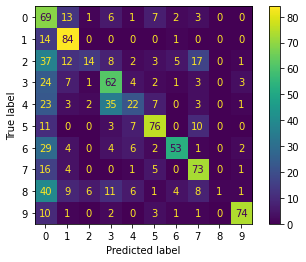

In [16]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/interpretation/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(
    base_path + "/topic_huffpost/interpretation/model/best-model.pt"
)

# 3. Run Test
results = []
classes = [
    "This text is about Family & Relationships",
    "This text is about Health",
    "This text is about Science & Mathematics",
    "This text is about Entertainment & Music",
    "This text is about Computers & Internet",
    "This text is about Education & Reference",
    "This text is about Sports",
    "This text is about Society & Culture",
    "This text is about Business & Finance",
    "This text is about Politics & Government"
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 22:25:29,381 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_huffpost/interpretation/model/best-model.pt
init TARS
Sentence: "Do I have to pay taxes on my points ? ? I hope not . I just got to level 3 and if I do have to pay then I ' m going to be in trouble . 21-47 % depending on your other sources of points ."   [− Tokens: 48  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9942)]}]
This text is about Business & Finance
Sentence: "does any body go to robert c. cooley middle school ? just wonderin NO NO NO CLUE EVEN WHERE DAT IS"   [− Tokens: 21  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9743)]}]
This text is about Science & Mathematics
Sentence: "what is the best way to find people you have not heard from in a long time , lost friends or family free or not ? friends from high school ... go to classmates.com ."   [− Tokens: 35  − Sentence-Labels: {'label': [This text is about Business & Finan

Sentence: "i am planning to post an advertisement about a product , is it possible that i can do it for free ? YEs - www.craigslist.com"   [− Tokens: 25  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9895)]}]
This text is about Business & Finance
Sentence: "Is it possible to close a criminal record for misdemeanor 3 offenses ? What did you do ?"   [− Tokens: 18  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9599)]}]
This text is about Business & Finance
Sentence: "Is it a bad time to sell a condo in orange county , ca ? Prices in OC are increasing , but the volume of home sales is down . In November I bought a condo that was listed for 2 days , now 3 in my complex have been on the market for over 45 days . However the place I bought was listed $ 50,000 less then the same model listed by another agent . By the time the bidding war was over I paid $ 10K more then the asking price , the other unit for sale was thrashed and sold a month aft

Sentence: "I have an internet business . How do I gain peoples trust ? I know that I ' m honest , how do I get people to give me a chance ? The most important sign to a trustworthy merchant is a secure website . Many merchants look for a website that is secured with an SSL certificate . The design of the website can impact whether someone will make a purchase or not . A reputable site will look reputable . You will sell more if you make it easy for people to purchase from your site . If you are in the United States , you could also register with the BBB to display an icon on your website . Most people recognize and trust the BBB logo ."   [− Tokens: 131  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9568)]}]
This text is about Business & Finance
Sentence: "how do I become a jewelry vendor for mervyns store in san diego ? Used to work in the corporate retail world ... you ' re going to have to contact Mervyn ' s corp which is in Pleasanton , CA ( bay area ) and 

Sentence: "What is a sommelier and whats their workday as ? What are his / her duty ? How much do they earn annually ? Information , duty , compensation A sommelier is a person who helps people chose wine in a high quality restaurant . They handle the wine menu , they consult with the customer about wine and food selection , and they often serve up the wine.Here is a great site describing what the work day of a sommelier is : http : // www.princetonreview.com / cte / profiles / dayInLife.asp ? careerID = 146Here is the Sommelier Society of America : http : // sommeliersocietyofamerica.org /"   [− Tokens: 109  − Sentence-Labels: {'label': [This text is about Entertainment & Music (0.7157)]}]
This text is about Entertainment & Music
Sentence: "I Need HELP ! ! ! ! ? I am doing a project that I am exporting telecommunications products to Mexico . All I need to know is a good website or two that will give me an idea of the exchange rate trends for this . Thank you to anyone who can help me 

Sentence: "Career advice for new college grad ? What do you do when you know that you hate your current job , but are unsure of where you want to move next , but you feel as if you stay at your current job ( which pays over 60k ) a moment longer that you are going to choke the manager , tie him up , and send him to India on a tiny sailboat ? I am a recent college graduate at my first job ... and although I love the company that I am with , I despise my job title ... but I am not allowed to change positions before my first year is up ... which is 4 more months to go . Does anyone have advice on how to be productive in a seemingly non productive situations ? You definitely have the carrot dangling in front of you - unless you live in california , 60k to start is excellent bucks - so whenever you start picturing your hands moving towards your managers neck and call fed ex to send him to india via the slow boat to china route , THINK OF THE GREEN - the moola , the buckos -- and as far as b

Sentence: "if you could change your name what will it be ? i think our names can affect our personality and how our lives unfold ... . do you ? I like the idea about how someone name affects his fate.I would name myself Yousef , Having a jewish name is cool ( I was thinking this is an arabic name but I have a jew friend with that name so its common between Arabs and Jews and it has the benefits of both : D ) His story as a prophet is also cool . Most handsome guy of the world , sold as a slave by his brothers , bought by a king , accused by a nympho , spent many years in jail , became king and returned to his family ."   [− Tokens: 134  − Sentence-Labels: {'label': [This text is about Business & Finance (0.8278)]}]
This text is about Business & Finance
Sentence: "Is it necessary to register URLs with the Board of Equalization if a Fictitious Business name is being used ? A business is required by law to register with the Board of Equalization its DBA ( doing business as ) name . If a b

Sentence: "i want to see your my space ? Hi , http : // www.myspace.com / phpndp _ executive _ coun2004The theme is conservation . Hope you like it.Bonnie"   [− Tokens: 28  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9665)]}]
This text is about Business & Finance
Sentence: "how can i delete the yahoo messenger from the start option ? Click on Start > Settings > Taskbar and Start MenuClick on Strt Menu tabClick on CustomizeClick RemoveSelect Yahoo MessengerClick Remove ( I hope this is what you meant )"   [− Tokens: 41  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9717)]}]
This text is about Computers & Internet
Sentence: "Who ' s against Myspace ? I ' m against it cuz it ' s bad & people may just say `` I only talk 2 my friends on there ! '' but the thing is perverts can hack into your profile & see where you live & stalk you & molest you & i don ' tthink it ' s good ... we should all not have one , or watch wat we put on there & p

Sentence: "Whats the best way to sell a Lap tap computer ? Advertise it as a Lap Top computer"   [− Tokens: 18  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9491)]}]
This text is about Computers & Internet
Sentence: "what do you currently have bookmarked ? hi5.spaces.msnanswers.yahoohsbc.egyptslidesworldatlas"   [− Tokens: 8  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9947)]}]
This text is about Business & Finance
Sentence: "where can i get c ++ software free ? You can download or buy only the CDs of the Visual C ++ Express 2005 from Microsoft ."   [− Tokens: 27  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9898)]}]
This text is about Computers & Internet
Sentence: "Where do I get more informations about writing a script in linux ? I have to write this Script using Linux and i do n't know how to do it . I have some few tips on how to do it but they are not helping much . If anyone knows where i can get 

Sentence: "what does it mean when everytime i try too update my computer it does n't install successfully ? its been like this for awhile now i ' ve tryed many things too solve this problem nothing has worked can someone please help me out i would really appreciate it thanks Clear your temporary internet files , clear all the temporary areas on your PC , you may need to show all files in windows explorer ( Tools , Folder OPtions , View - Show hidden files AND untick Hide System Files ) C : & # 92 ; temp C : & # 92 ; windows & # 92 ; temp c : & # 92 ; Documents and settings & # 92 ; usernamexx & # 92 ; Local settings & # 92 ; Temp C : & # 92 ; Program Files & # 92 ; WindowsUpdate ( all files in these locations can be safely deleted ) and try again . If it still fails then post again with specific updates that fail . I have seen a number of PCs that have had a problem with the Microsoft Installer 3.1 update , all other updates then fail . If that is the case uninstall the Installer Updat

Sentence: "What is the largest LCD Monitor I could use effectively using 3D Max ? I was looking into the Viewsonic n2750w 27 '' HDTV that actually was on G4 TV as a good gaming monitor . I was under the understanding that too big can make computer `` graphics '' blurry . One of the most important factors , that nobody else ever seems to care about ( and it pisses me off to no end ) , is the RESOLUTION of the monitor . And I ' ve never seen an LCD tv that has a resolution higher than 1280 * 1024 ( an `` amazing '' performance , achieved in the last millennium by over 99 % of the common 17 '' CRT monitors and many 15 '' monitors too ) . The 27 '' beast you mention makes no exception ; its resolution is even lower : 1280 * 720 . My Viewsonic VA1912w ( 19 '' ) already beats it ( 1440 * 900 ) and my ( older ) 19 '' CRT totally humiliates it ( 1600 * 1200 ) . Even my 15 '' laptop screen has 1400 * 1050.What this means ( having a HUGE monitor with a low resolution ) is that you wo n't have mo

Sentence: "How do I know if someone is remote accessing my system ? Is there a utility program that will tell me if my boss is looking at my screen when I ' m at work ? WindowsXP Pro OS.Thanks . Majority of the time businesses have special technicians who run random computer checks to see what is being downladed onto their computers . There is a BIG chance that your boss or someone else is looking at your computer . I would look for computer hacking sites to see if it is an possibilty that you can hide you activites ( if you have any ) on the computer . Also I would start deleting my cookies because those hold computer page memory . Two site I would check into to see if there is software available is Mp3rocket.com and Frostwire.com Good Luck"   [− Tokens: 143  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9844)]}]
This text is about Computers & Internet
Sentence: "can we insert a p4 processor for a celeron D configurated system ? Get a new motherboard for you

Sentence: "Difference Between Windows Media Player 11 Beta 2 and Windows Media Player 11 , the official download . ? I downloaded the WMP 11 Beta 2 pack , and saw the Microsoft just released the first non-beta version of WMP 11 . Do I have to redownload the non-beta version , or is it the same as Beta 2 . Beta software is software that is not fully ready to be released , but is being made available so that people can test it . You will definitely want to download the non-beta version because it is the final version of WMP11 . Beta programs usually have some bugs still in them ."   [− Tokens: 113  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9819)]}]
This text is about Computers & Internet
Sentence: "Offline message from friend , who insists he has n't send it to me ? I received this offline message from a friend in my list . He insists he has n't send me this particular message . The link takes u to some geocites site where u have to log on with your own pas

Sentence: "Good inexpensive video editing ( high-quality ) program ? I ' m going to be doing a video for a project and want something good that can trim video , do special effects , and if possible create a DVD ( image to transfer on a mass-storage device , because i do n't have a burner ) . Also , multiple format support and conversion would be nice . Nothing over $ 50 , please . Please list the price with the program . for cheap check http : // www.pinnaclesys.com"   [− Tokens: 91  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9886)]}]
This text is about Computers & Internet
Sentence: "What are the various virus detection tools ? PLZ ANSWER THE QUESTION POINT WISE AND GIVE DETAIL ABOUT EVERY POINT ."   [− Tokens: 21  − Sentence-Labels: {'label': [This text is about Business & Finance (0.987)]}]
This text is about Business & Finance
Sentence: "internet protocol ( negotiations of various connection characteristics ) ? Negotiations of various connection charac

Sentence: "What are factors of 61 and 62 ? Please answer quickly because my Math homework is due tommorow ! Prime factors ? All factors ? Common factors ? 62 is divisible by 1 , 2 , 31 and 6261 is prime so its only factors are 1 and 61For prime factors the answers are : 62 : 2 , 3161 : 61For common factors , the only answer is : 1"   [− Tokens: 71  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9947)]}]
This text is about Business & Finance
Sentence: "Economics or Engineering ? I ' m starting my freshman year in the fall . Which would be better , considering job market , pay , competitiveness , and prestige and any other factors ? I ' m planning on following through with a masters degree in whichever major that I end up choosing . If you ' re going on with a masters afterwards anyway , then I ' d say the Engineering will serve you better at the undergrad level , regardless of which direction you choose.I ' m just finishing my Ph.D. in Economics . When I was appl

Sentence: "mechanism of the reaction of 3-oxobutanal with acidic methanol ? First of all , how do u make acidic methanol.3-oxobutanal : - is that a butane with double bond in the thid position or an oxygen in the 3rd position ? o-cH2-cH = cH-cH3 + cH3-cH2-OH - > cH3-cH = cH-cH2-0-0-H-cH2-cH3under high temperatures and pressures I guess ."   [− Tokens: 58  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9305)]}]
This text is about Science & Mathematics
Sentence: "i need a website that show me a math problem ? alegra problems If you ' re up for a challenge : http : // rec-puzzles.org / This is a website of many famous puzzles , most of which are math-related . These puzzles have been collected for decades , and they are HARD , but fun ."   [− Tokens: 58  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9913)]}]
This text is about Science & Mathematics
Sentence: "whats going to happend next ? what is going to happend when the world ends ?

Sentence: "Adding Parentheses ? Where do you insert the parentheses in the following statements to make true-8 + 3-2 + 7 = - 2-8 + 3-2 + 7 = - 164-5 + 2-6-11 = 64-5 + 2-6-11 = 2 - ( 8 + 3-2 ) + 7 = - 2 - ( 8 + 3-2 + 7 ) = - 164-5 + 2 - ( 6-11 ) = 64 - ( 5 + 2 ) - ( 6-11 ) = 2Man you really had me working there . I deserve the 10 points now !"   [− Tokens: 94  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9857)]}]
This text is about Business & Finance
Sentence: "what are your view about engg . line and future ? its a fundamental science . from career perspective - its a safe haven . from professional point - yo will always be in demand.Some disciplines ( Civil , Comp . Science , Mechanical ) will alway be in demand but you should aim for what branch is of interest to you.Overall , engineering is easier comapred to Medicine ."   [− Tokens: 70  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9773)]}]
This text is about Science & Mathemati

Sentence: "Applying to College ? Personal Statements ? I have already written , revised , and further revised , asked former teachers to help revise. . and then rewrote again my personal statement . But I would still like to hear advice from any experts or knowledgable people ' s advice about applying to both UC ' s and private schools . Stress leadership . Stress initiative . Stress your individualism . Write concisely , and for God ' s sakes do n't make spelling or grammatical mistakes ! Do n't spend too much time touting your academic achievements , unless they apply to your initiative and leadership ( they can see your grades elsewhere ) . They want to know you will succeed in College . And unlike high school , College is not some mandatory thing you have to go to ( or , conversely , are entitled to ) and the reviewers know it . The top schools are looking for kids who will work their butts off , who have a proven record of working their butts off , and who will continue to work th

Sentence: "Prolly ? ... . Prolly Not ? Am I just missing out on some new cool lingo ... or do people really think there is a word `` prolly '' I have NEVER known anyone to write this word before ... until I came on Yahoo answers . So many people write it ! The word is `` Probably '' I even thought maybe I have been ignorant all my life so I looked it up in the dictionary . Not there.Folks ... some of you have some pretty good answers , but the answers lose credibility when the answerer comes across as dumb.Use spell check , and use actual words in your answers . Its a bunch of kids who are trying to be cool . Do n't answer their questions . We are way out of their age / intellectual range . Just leave them be ."   [− Tokens: 149  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9705)]}]
This text is about Science & Mathematics
Sentence: "what is the logo with a parrot and a red ring around him ? Ca n't tell you ; but I found a few images : http : // www.embroid

Sentence: "who is assaf rosenblatt ? Is his `` answers engine '' in brainboost really a breakthru or is it just a new gimmick ? How is Brainboost different from existing engines like Google ? Brainboost is an answer engine whereas Google is a Search engine.What that means is that Brainboost actually finds answers to your questions posed in plain English as opposed to directing you to pages that simply mention the questions.Brainboost , Using the AnswerRank ™ system , intelligently reads hundreds of web pages derived from search results and extracts just the short and concise answer to your question , saving you time.Following is a simplistic explanation showing the process of both engines Google * User types in : “ Why is mars red ” * Google Search engine retrieves all pages containing words `` mars '' and red '' . * Search results are sorted by the number of links each one of them got from other pages . This is a good way to figure out which one of them is most trusted by others . * R

Sentence: "Are there cheerleaders at cal state east bay , if so , is there a website that I can go to , to see them ? I am a junior and I am going to be a senior next year . This is my last week of school and I want to start to collge search now. - Thanks - Go to the school ' s web site and locate the number of the athletic department , or student affairs or admissions and give them a call ... they ' ll help you out ... The best cheerleading schools are in teh south east though ... Kentucky , Florida ..."   [− Tokens: 110  − Sentence-Labels: {'label': [This text is about Sports (0.9513)]}]
This text is about Sports
Sentence: "What is a natural monopoly and why do they exist ? A natural monopoly is one that exists because of economies of scale rather than one created by a government to fill the need.Telephone companies , cable companies , et cetera are often local monopolies give sole license to operate within a city because the cost of deploying cables or wires to the home would be cos

Sentence: "is it just me or is DANE COOK a complete unfunny jackass ? He ' s so hilarious I spank myself"   [− Tokens: 21  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9871)]}]
This text is about Business & Finance
Sentence: "Joey Tribbiani or John Stamos ? ? TOTALLY Joey , he ' s got the accent going ; )"   [− Tokens: 19  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9564)]}]
This text is about Science & Mathematics
Sentence: "who LOVES imdb.com ? i do . = ] Me too ! !"   [− Tokens: 13  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9927)]}]
This text is about Business & Finance
Sentence: "what do you think is jay-z ' s best song ? Show Me What You Got"   [− Tokens: 16  − Sentence-Labels: {'label': [This text is about Entertainment & Music (0.9785)]}]
This text is about Entertainment & Music
Sentence: "What is the best modest mouse song ever ? grey ice water , dramamine , black cadillac , paper thin walls ..

Sentence: "How do I get Recognised as a musician ? Put out a song & die a sudden unexplained death ."   [− Tokens: 20  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9859)]}]
This text is about Science & Mathematics
Sentence: "What ' s your top 3 TV shows ? greys anatomylaguna beachnumbers"   [− Tokens: 12  − Sentence-Labels: {'label': [This text is about Entertainment & Music (0.9892)]}]
This text is about Entertainment & Music
Sentence: "Your Favorite ? Which did you like better ? The new or older Charlie in the Chocolate Factory / Willy Wonka and The Chocolate Factory ? I think the original one ... I did like the new version , thought Johnny Depp was good but the ooompa lumpas just were n't as good ... and seeings as we are in an age of digital wizardry , I expected better ... so yeah , the first one ... classic"   [− Tokens: 78  − Sentence-Labels: {'label': [This text is about Entertainment & Music (0.9781)]}]
This text is about Entertainment & Music
Sent

Sentence: "Road Rage Survey ? 1 . ) Do you often experience road rage ? If so , what bothers you the most ? 2 . ) For those of you who live in states that receive alot of snowfall - Does it upset you when people drive crazy when the roads are noticeably slippery ? 3 . ) What does your ' road rage ' consist of ? My views - The only time I experience road rage is when another driver does something stupid that could endanger my life , such as driving crazily in the wintertime when the roads are slippery . It makes me mad ! If only people would leave a few minutes early when road conditions are like that , they would n't have to rush . 1 . Yes , but it takes more than a couple people to piss me off . It just sort of builds up until I explode . What bothers me the most is people pulling out in front of me ESPECIALLY WHEN THERE IS NO ONE BEHIND ME AND THEY COULD HAVE WAITED THE EXTRA TWO SECONDS and what makes that worse is getting in front of me and then going SLOWER . And rubberneckers . T

Sentence: "Whats the differences between Acoustic Guitar & Acoustic Electric Gutiars ? I do n't understand the differences Acoustic guitars can not be plugged in . They have no electronics . Acoustic / Electric guitars look the same as Acoustic [ they are both hollow-bodied ] . The only difference is that Acoustic / Electrics can be plugged in . They have a jack and a small pickup which is not highly visible yet allows the instrument to be plugged into an amplifier which increases the volume of the instrument [ also allows electronic effects to be added to enhance sound quality during performance ] ."   [− Tokens: 105  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9699)]}]
This text is about Computers & Internet
Sentence: "Jokes strictly for men . ? 1 . What is the similarity btw a woman and a bank ? 2 . Why has it been voted that women will be future football goalkeepers ? 3 . 3 thiefs stole some diamonds from a jeweller . Hiding away they took shelter in a 

Sentence: "im turning 14 . what would be a good idea for a birthday party ? dont suggest something cheesy , im not turning 9 . 1 ) Go to a roller skating rink and get some pizza , ice cream , cake , and soda ... bring a digital or polaroid and make some memories with friends ... and go at night ... therefore it has a more grown flirty effect and more teen . think jessica simpson ' s `` public affair video '' 2 ) Bowling is fun too. . 3 ) Take a few of your friends shopping with you ... 4 ) HOUSE PARTY ... go easy though. . if you have restrictions with guys-then only gilrs. . a girls nighting then . WELL have some chips and good music later on some other grub pizza-cake. . some innocent fun games. . try twister , truth or dare , karaoke , dance battling ... even make up party games. . or have a trivia about you. . see which one of ur friends know you the best5 ) laser tag is cool too , grab some guys and girls make it a boys vs.girls type thing ... flirty competition.6 ) Movies very ca

Sentence: "What is the funniest prank that someone you know has pulled ? My friend J.R. and I were riding in the backseat of another friends car and he some how start making the sound a flat tire . I have no idea how he did it but it was really convincing as he matched the speed of the car and everything . She , the driver , starts freaking out and pulls over to check all 4 tires which were fine . By this time we were cracking up . Oh , where to begin ... I ' ve pulled so many ! Well , riding in a pick up with guy driving , guy in the middle and me in the passenger seat , as we were stopping at a busy intersection I ducked down so no one could see me . hehehe Put clear cellophane tape on the lenses of a coworkers glasses and watched him try to clean them about 15 times before he figured out why he could n't see out of them ! That was great . He tried to retaliate by locking my bag in a cabinet . Even took lunch early so he ' d be back in time to be there when I left . I noticed the pad

Sentence: "Which country in the world do you find most beautiful and sexy women ? I guess it ' s matter of opinion , but I have been told on numerous occassions from foreigners to our country that South African babes are the best and hottest ! !"   [− Tokens: 47  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9076)]}]
This text is about Business & Finance
Sentence: "My fiancee said our relationship is going down the tubes ... Is it true HELP ? We have been through so much together and we have been arguing alot lately . I believe I am suffering in depression and I have back sliden significantly in my walk as a Christian . We went to Vegas for a weekend trip with all of our friends and one night I got really drunk and yelled at him and berated him and told him `` I felt like beating him up or leaving the Room '' . Needless to say I had a reason to be upset but not to express myself in that manner . I felt ashamed and foolish . I also got really insecure and starti

Sentence: "How do I approach my wife about either adding another woman or going to see another woman by myself ? I just need some helpful suggestions here , please no moralistic preaching . Oh yes my friend you are so lucky I have bumped into your question . I have dedicated countless scientific hours to the study of this and I am happy to inform you that I have succeeded.THere are several aproaches you can take but first you need to find out why you want to do this ? a ) is it just a sexual thing ? b ) is it that you want to incorporate a second wife into the family dinamycs ? What exactly are you feeling ? Know that this is not a quick process , it will take you months if not years to work on her in order to agree to this and even then it may not happen ever.With that said lets get to it.If its the sexual thing then it will be a lot easier than you think , its not that hard to get a woman to agree to it , now the realtionship part that one will be a tought one but let me assure you t

Sentence: "what is it about nice girls / boys why do we ALWAYS finish last ? i was raised that you treat others the way that you want to be treated . so now i am in the dating scene and i always end up the little sister of the group . mean while i watch as my friends and the guys that i like end up with just horrible people . enough so that i decided to take a break . i am just so frustred with this that i dont know what to do . Hi , Finish last ? Relationships are built on trust , compromise , love , caring , and wanting to make another happy ; doing everything you can to make it so.I ' ve been married now for 29 yrs to a wonderful woman . First marriage ended in Divorce after 7 yrs.I am one of the `` good guys '' ; respecting others.Do n't change yourself ; be honest and open.Ending with horrible people is their choice ! ! ! If you are selective , dating can be fun . Chose someone to date who has similar likes as you ... . who seems to be trusting and honest.You ca n't lose ! Do n't 

Sentence: "What are some famous sentences to ask on a date ? american common dating request ( phrases ) you do n't ask sentences . You ask questions . Try `` where did you grow up ? '' or `` what do you do for a living ? ''"   [− Tokens: 48  − Sentence-Labels: {'label': [This text is about Business & Finance (0.8004)]}]
This text is about Business & Finance
Sentence: "Does Anyone like dating ? dating sucks . cost too much ."   [− Tokens: 12  − Sentence-Labels: {'label': [This text is about Business & Finance (0.687)]}]
This text is about Business & Finance
Sentence: "I Need Help Somebody ? how do i show my avatar go to your email and it ' ll show that gray smiley face next to `` hello , [ name ] '' . click on the gray smiley face and go from there . and make sure you save everything [ the little button on the left side under the zoom and stuff ] ."   [− Tokens: 66  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9452)]}]
This text is about Computers & Internet


Sentence: "why are women so attracked to money ? when chicks see me they usually dont take a second look . i mean , im not ugly , but im no super model , just an average guy . but then they find out that i have a good amount of money to my name and their eyes light up like a Las Vegas slot machine . why is this ? ( and dont say its not true cause it is . give me a real honest answer . the guys can back me up on this ) This is why it makes me so mad to be a woman ! ! ! ! ! Fortunately we are not all like this ! ( just 98 % of us ) Screw all this crap where these chicks are saying money equals security and blah blah blah . When they find out you have money they see things like shopping , spas , expensive resturants , diamonds , big houses and gifts flowing til no end.Money should n't mean anything to a woman if she is actually into YOU and not your bank account . Next time a girl shows no interest in you and than changes because they know you have money do this : them that you changed yo

Sentence: "how do i no if a guy likes me ? Probably the best way to know if a guy likes you is to simply ask him , but we all know that can be a challenge . So , here are a few clues to working out if he likes you as much as you like him . Steps Examine his body language . If he likes you , you will see that his body position will lean forward toward you . Keep close . Ever get the feeling that somebody is `` in '' your personal space - so much so that you want to step back ? If he likes you and you like him , neither of you will step back . Make eye contact - if he likes you , he ' ll get it and hold it . Again , this can be uncomfortable if you do n't like him or vice versa . You ' ll know if you feel like you have held eye contact just a fraction of a second longer than you would with anyone else , or if he looks away quickly . Be aware of touching - he might put his hand on your arm when he laughs , or not move his leg if it happens to touch yours . This is a very good sign that he

Sentence: "when will my lil bro in laws tooth come out ? date and time sounds like any minute now"   [− Tokens: 19  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9726)]}]
This text is about Science & Mathematics
Sentence: "can depression kill you ? ? ? serious answers plzzzzzzzzzzzzzz ! ! Depression can lead to other things that can kill you . Aside from suicide itself , depressed people tend to have eating disorders - either too much or too little ( each bringing with it its own set of problems ) and sleeping disorders - either too much or too little ( again each with its own set of problems ) . Depressed people turn to drugs and alcohol to cover the pain - again we know the problems these carry with them . Depression can take over your life making you dead inside long before a physical death comes to you ."   [− Tokens: 115  − Sentence-Labels: {'label': [This text is about Health (0.9757)]}]
This text is about Health
Sentence: "horny goat weed side effects

Sentence: "wieght loss ? well in the past 6 months or so ive gained 80 pounds and have been trying to loose it . ive tried crash dieting a few times but have never had the will power to go threw with it . what i need is how to get the will power Crash dieting will make you fatter in the long run . This is because your body goes into starvation mode . The human body is designed to hang onto fat in case of famine . This is something that we have carried with us since before we were living in caves and evolved because food sources were less certain at that time . We live in a modern world now where there is plenty of food . But our evolution is still in the caves and our bodies do not recognise this ( unfortunately ) . Hence the minute we cut calories drastically to try to lose weight quickly , our bodies behave as though each meal will be our last . The end result is our metabolisms slow right down . That is why we often end up fatter after a period of crash dieting . What you need to do

Sentence: "Heart attack ; what are my chances of dieing of a heart attack when i grow up ? im 16 , my father past away feb . 23rd 2006 of a amssive heart attack and my grandma died of a massive heart attack , both on my dad ' s side ... is there any chance i will also have a bad heart when i grow up ? i already have medical problems ... i have a sleep apnea , a spinal cord problem and many alergies to different things , but most of those do n't matter , im just very afraid of having a bad heart ... . could someone help me possibly ? Dear Bobo : I think it is very natural to feel worried about a heart attack if one ' s father has just died of one a couple of months ago . Here is my answer : FIRST : You ARE worried ; the question is , SHOULD you be worried ? The answer is more difficult than just statistics . If you want statistics , cardiac risk , i.e . the risk of a heart attack can be easily calculated : http : // hp2010.nhlbihin.net / atpiii / calculator.aspBut as it states , this ca

Sentence: "how long nicotine stay in urin and blood ? I smoked cigaret for 15 years 3 or 4 stick a day . I ' ve heard about 4 days.When I quit smoking several years ago ... here ' s what I did . I took a two liter bottle of water and went into a sauna . I kept on drinking water . When I started to sweat heavily , I would exit the sauna and take a quick shower ... rinsing the sweat off of me . I would then return to the sauna and repeat the procedure until I had drank all the water.I felt great ! That first day went fairly easily . The next day was pure torture . I think I sweated out all the nicotine that first day and had massive withdrawels on the second . Still , my withdrawel lasted a much shorter time than other times I attempting quitting.Good luck !"   [− Tokens: 159  − Sentence-Labels: {'label': [This text is about Health (0.9706)]}]
This text is about Health
Sentence: "My period has not come on , I ' m spotting , both urine & blood test say I ' m not pregnant . What is the pro

Sentence: "What does phototoxic mean ? referring to grapefruit essential oil : Safety Information : Phototoxic . Do not use if the area of application will be exposed to sunlight for 24 hours due to its phototoxicityObviously I can see that it will have a reaction with the sunlight , but what exactly will happen ? What kind of toxins are produced ? A phototoxic substance is a chemical compound which becomes toxic only when exposed to light.Phototoxicity is a phenomenon known in live-cell live cell fluorescence microscopy , where illuminating a fluorescent molecule ( the fluorescently active site is called a fluorophore ) causes the selective death of the cells expressing it . While not completely understood , it seems to be clear that the main cause for phototoxicity is the formation of oxygen radicals due to non-radiative energy transfer.Typically in fluorescence , photons of a certain wavelength excite electrons of the illuminated fluorophore to higher energy states . When these exci

Sentence: "I have a Big problem i need help Please ! ! ! ? My problem is my Jelousy i know i have it , its hereditary but i have more control over it than my dad did he was abusive i tend to catch myself thinking it my girl friend does not understand at all about it . like she told me she was going to see some family somewhere and it is her brother and nephew , Its like its a subconcius thought from my past warning me and i try to push it back but it clouds my judgement its really annoying and hurts very badly me and her. . is it possible for a girl to understand that its not about her , that it ' s not her causeing the jellousy and not take it so personally i dont want this problem anymore i know if it happens to much it WILL ruin my relationship . What can I do HELP ! ! ! anyquestions please contact me ID biggydreavThank you you are going to distrub your life just tell every thing to your girl firend"   [− Tokens: 190  − Sentence-Labels: {'label': [This text is about Business & Finan

Sentence: "I have a very embarrassing problem which seems to be getting worse . I need to urinate frequently . ? Yes , I have seen my doctor and he tested for diabetes which I do n't have . He ' s set up an appointment for me to see a Urologist but the appt is a long way off . This is effecting my life greatly . I ca n't go anywhere unless I have notice first , That way I do n't drink anything at all . Otherwise , I ' m not out the door 10 minutes and I have to p ** again , which causes me great stress especially since most restaurants etc . have a washroom sign posted for customer use only . I do n't sleep good either . I try not to drink anything after 6pm but I still wake up almost every hour to use the washroom . Any ideas what could be wrong , no other symptoms that I can recall right now . I had a similar problem about two years ago . It turned out that I had a weird bladder infection . It cleared up with two weeks of antibiotics but it was worrisome and frustrating when I did n'

Sentence: "to the male ? Do u like to have boobs ! Yes.Very much ... ... ... ... ... I would like to have boobs in my mouth and in my hands.I mean I like to have my girl ' s boobs in my mouth and in my hands : )"   [− Tokens: 50  − Sentence-Labels: {'label': [This text is about Business & Finance (0.4965)]}]
This text is about Business & Finance
Sentence: "what ' s the best glute workout ? squats and lunges and there is a variety of each that you can do - and whoever said Gilad because he is excellent ( a little dorky , but excellent )"   [− Tokens: 39  − Sentence-Labels: {'label': [This text is about Health (0.9962)]}]
This text is about Health
Sentence: "Please help me : ( Why am I so worried ? Ahh , okay here I go . I know this may sound stupid to most of you , but I do n't know : ( Well , I was with this guy from September 8th - 12th and although we did not engage in sexual intercourse , I gave him a handjob and he fingered me . Although his fingers were n't like `` dripping '' wit

Sentence: "could someone receive HIV / AIDS if ... . ? critical thinking questions from my science textbook : ... if a male that has already gone through puberty were to where an older cousin ' s underwear ( who is not infected with HIV / AIDS ) ... . if a male that has already gone through puberty were to where a friend ' s underwear ( that has already gone through puberty and is not infected with HIV / AIDS ) . what i think is that since there is no HIV / AIDS in the first place , nothing is transmitted ? your help is appreciated , thank you aids / hiv is transmitted through the exchange of bodily fluids through the bloodstream ."   [− Tokens: 126  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9628)]}]
This text is about Science & Mathematics
Sentence: "Can i train my upper legs and butts three times a week ? Does it affect the growth of the muscles ? Yeah , they might get bigger and more muscular"   [− Tokens: 31  − Sentence-Labels: {'label': [This text i

Sentence: "why when people have sex they move it back and forth instead of just leave it in there ? Because when you put it in there , it starts to itch very badly and they move back and forth to rub off that itch ."   [− Tokens: 45  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.956)]}]
This text is about Science & Mathematics
Sentence: "I wonder how it feels to be a woman ? is it nice ? I am a man , but all my life I wished taht I were a woman . It can be nice at times . But other times it can be a real pain in the but * . Women have always had to fight or connive or be better than a man to get recognized for being herself . Some of the time you have to deal with macho men who think they are god ' s gift to women , and there is no way a woman does n't want them . I think women feel things differently then men ... it ' s hard to explain , but being a woman is not always a picnic . I suppose it ' s the same for a man too . There ' s an old saying that goes ``

Sentence: "Should we get rid of welfare in the US ? No cash assistance or food stamps ? NEW YORK - The number of city residents relying on food from charities and unable to feed their families is rising , according to a report issued by an advocacy group . Nearly one in six city residents lived in households that could not afford to buy enough food during the three year period ending in 2005 , according to the New York City Coalition Against Hunger report released Tuesday.These households made up 15.4 percent of city residents — up from 14 percent between 2000 and 2003 , according to the report , which was based in part on figures from the U.S. Department of Agriculture.According to the coalition ' s survey of the city ' s food pantries and soup kitchens , the number of people served by those charities rose an estimated 11 percent in 2006 . `` I do think there ' s an increased demand , especially when I know that many of my staff in my own agency utilize food kitchens in between pay pe

Sentence: "Why are Conservatives so scared of Hilary Clinton ? Everywhere I look , I see conservatives trying to paint Sen . Clinton ( D-NY ) as some sort of firebrand liberal . Her record in the Senate certainly does n't support that characterization . Obviously this is a blatantly partisan attempt to smear the soon-to-be front runner for the Democratic Presidential nomination . Why are conservatives so scared of Clinton , and not Gov . Mark Warner or Sen . Joe Biden ? Is it because they think she can win ? I think it ' s a smokescreen . There ' s a lot of noise being raised about Ms . Clinton , and most of it ' s coming from the Republicans . I think the plan is to get the recognition factor going , and hope that she gets nominated , because the GOP think they ' ll have an easy time beating her . If they try that Swift Boat garbage with her , they just might . She ' s a very polarizing figure , and if you ' ve been on Yahoo Answers awhile , you know that there ' s people that absolut

Sentence: "Is there a free search engine to gov . grants for an individual ? Yes there is a free database on government grants - but government hardly give grants to individuals . Most of the federal grants are given to specific target groups with specific requirements ( e.g . minority business owners involved in transportation related contracts emanating from DOT - Grant # 20.905 Disadvantaged Business Enterprises Short Term Lending Program Nonetheless , you can go to the Catalog of Federal Domestic Assistance ( CFDA ) http : // www.cfda.gov and Grants.gov http : // www.grants.gov - these are two sites created by the federal government to provide transparency and information on grants . Browse through the listings and see if you can find any grant that would support a for-profit venture.These government grants generally support non-profit organizations , intermediary lending institutions , and state and local governments.For private grants , you may want to check the Foundation Center

Sentence: "Why wo n't Bush meet with the Minutemen ? Really , he knows their there . And they are a growing group . And they have asked for a meeting with him . Why wo n't he ? Bush , along with Kennedy and McCain are the three top traitors of this country , as far as I am concerned . They could care less about the American people , especially the middle class . Bush wants to give our sovereignty away as fast as he can . He is a disgrace to us . I am ashamed that he is our president ."   [− Tokens: 104  − Sentence-Labels: {'label': [This text is about Politics & Government (0.9836)]}]
This text is about Politics & Government
Sentence: "when an online predator gets caught and arrested , are they charged for setting up a place to meet the minor ? for sex or for talking dirty and sending explicit images over the internet ? depends on the state and statutes , but they can be charged with the endangering of a minorand pedophillia"   [− Tokens: 55  − Sentence-Labels: {'label': [This text is 

Sentence: "did the bush admin allow 9 / 11 to happen ? i have read several books on this subject and 1 book in particular highlights the fact that on that fatefull day these planes would never be allowed to fly into the twin towers , even allowing for the 1st plane with such a long gap between the 2 surely the 2nd plane would have been intercepted , mass murder was committed that day yet no answers are given as to why the U.S airforce and NORAD and did nothing , under U.S law these planes would have been diverted long before they flew over NY , why did it fail on 9 / 11 ? you have a TON of researching to do ... . you need to research the free masons , new world order , bush , nazi , etc . this site will help some : http : // www.infowars.com / . plus google the video section for all I mentioned above . At least 100 videos on the topics.to all those that say there is no conspiracy ... ... then explain this . why did George HW Bush give a speach to congress on Sept 11th , 1991 and he spo

Sentence: "What do you really think of George W. Bush , the president of the United States of America ? A fool , a hero ? Let me know your thoughts about him ! George W. Bush is a multifaceted man . He is definitely a social conservative -- and in that , he and I have absolutely nothing in common -- , but he is also not a raging nationalist ( and I celebrate the latter , especially with regards to immigration ) . He is pro big business , but he is not an economic conservative ( his administration ' s spending is extraordinarily high ) . It also is the case that there have been spectacular changes between the two administrations he ' s lead . The first four years were dominated by dismal decision-making , war-mongering , deception , terrible self-inflicted damage to the image of the US internationally , foolish foreign policy , etc . The second Bush administration has been orders of magnitude better on the foreign policy front , with Condoleeza Rice at the helm ( now the US is finally l

Sentence: "how do i find out why my friend got arrested in oregon state ? If you know the town or city , and date of arrest , you can check the local newspaper on-line for the police blotter . If it was a more serious crime , you can check for local TV news stations and see they say anything about it.Also , if you know if it was city , or county police that arrested him , you can sometimes call them and explain that you are a friend from out-of-state , and that he has asked you for help , but you want to be sure he is n't lying to you about the charge . Since it ' s public record , they may offer to tell you over the phone ."   [− Tokens: 135  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.2986)]}]
This text is about Science & Mathematics
Sentence: "Do you think the system of wealth distribution in the US is fair ? Does capitalism fairly reward everyone based upon their contribution to society ? Is Bill Gates or Warren Buffett 1,000,000 times more talented or

Sentence: "how how dose it cost to change my name ? It depends on where you are from . In Massachusettes it is $ 30 and if you are underage you need a parent to consent . If one of your parents are not in the picture you have to put an ad in a newspaper for one week to see if it will be disputed by your other parent . If you are over the age of 18 you can call your local town hall or the town hall of the city you were born in and they can give you more information ."   [− Tokens: 104  − Sentence-Labels: {'label': [This text is about Business & Finance (0.7837)]}]
This text is about Business & Finance
Sentence: "what grade would you give the US ' s rsponse to 9 / 11 and why ? consider iraq , homeland security , international relationships , border security , political cooperation between republicans and democrats , alternative energy sources , dependence on foreign oil , use of military , war strategy , etc ... if possible ( although not neccessary with your response ) provide a thesis 

Sentence: "If a small nuclear bomb were to detonate in NYC how many people would die in a 25 miles radius ? I ' m a hs teacher and I ' m trying to develop a lesson plan on the cold war / nuclear proliferation era , and now possible terrorism plot to use a nuke . Too many variables to consider , it ' s impossible to answer in this forum . First of all , what do you mean by `` nuclear bomb . '' There are crude nuclear devices , which is called `` dirty bomb . '' A dirty bomb is basically a normal bomb with whole bunch of radioactive waste . The explosion will send the particles into the air , making SOME people die and thousands sick . Also , decontainmenation would be a nightmare and public panic . A small bomb could also be a tactical nuclear device . Those are the so called `` suitcase '' bombs developed during the cold war . They are , for the most part , not very effective . Consider that it ' s very heavy and easy to detect by our current sensors in major cities . If your definitio

Sentence: "How can i get regular pen ink off paper ( obviously not with white out ) , so that it looks unscathed ? I do n't know if this helps , but I was doing a separation in organic chemistry and I sprayed dichloromethane on a page of my lab notebook . The solvent took out the writing I had ... I ' m not sure , though , if the paper was stained as a result ."   [− Tokens: 78  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9797)]}]
This text is about Science & Mathematics
Sentence: "what kind of pill is pink , round and has a C onone side & 86 / 62 on the other . ? The pill is called Skelaxin . It is a muscle relaxant ."   [− Tokens: 35  − Sentence-Labels: {'label': [This text is about Health (0.9911)]}]
This text is about Health
Sentence: "How big is the Sun ? The Sun ' s diameter is 864,938 miles ( 1,391,980 km ) . This is almost 10 times larger than the planet Jupiter and about 109 times as big as the Earth . The volume of the Sun is 1,299,400 times bigg

Sentence: "What is the difference between `` Supersonic '' and `` Ultrasonic '' ? `` Supersonic '' Supersonics , branch of physics dealing with the phenomena arising when the velocity of a solid body exceeds the speed of sound in the medium , usually air , in which it is traveling . `` Ultrasonic '' Ultrasonics , branch of physics dealing with high-frequency sound waves , usually in the range above 20,000 hertz ( Hz ) , that is , above the audible range ."   [− Tokens: 84  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9959)]}]
This text is about Science & Mathematics
Sentence: "How could the first astronauts take off from the moon ? Is landing on moon a FAKE ? Why there is no video record about taking off from the moon ? Not all the people working for the NASA had direct control on the landing on the Moon ... so it could have been faked ... Just a dozen or two of people was in the position of really know ... Remember Van Allen belt ... this is impossible for

Sentence: "how do you measure an inch of rainfall , does it depend on the diameter of the collector ? Measure it in any collector . Just have a standard procedure . Vertical collector , have a funnel at its mouth , let water drip down from funnel to collector . measure the rain fall in mm with ur scale . if u want a detail procedure i will give u a web site . it rocks. . belive in tuth. . ! http : // www.rcn27.dial.pipex.com / cloudsrus / measurerain.html"   [− Tokens: 90  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.953)]}]
This text is about Science & Mathematics
Sentence: "is there life form on mars im 12 and my project on life on mars and mabey ur apinyon wood help ? To date , no signs of Martian life , either present or past , have been found . But we should n't give up , as this is not an ultimate answer , it ' s only what the past measurements and observation told us . Further inquire and more accurate experiments are in preparation by the various sp

Sentence: "What is the meaning of chemistry ? Definitions of chemistry on the Web : * the science of matter ; the branch of the natural sciences dealing with the composition of substances and their properties and reactions * the way two individuals relate to each other ; `` their chemistry was wrong from the beginning -- they hated each other '' ; `` a mysterious alchemy brought them together '' wordnet.princeton.edu / perl / webwn * Chemistry ( in Greek : χημεία ) is the science of matter and its interactions with energy and itself ( see physics , biology ) . Because of the diversity of matter , which is mostly in the form of atoms , chemists often study how atoms interact to form molecules and how molecules interact with each other . en.wikipedia.org / wiki / Chemistry * Chemistry is a Japanese popular music R & B duo . They are Dochin Yoshikuni ( 堂珍嘉邦 , born Nov 17 1978 ) and Kawabata Kaname ( 川畑要 , born Feb 28 1979 ) . They were the winners of the ASAYAN auction in 2000 ( by Sony M

Sentence: "Descartes ' Rule of Signs ? I do not understand Descartes ' Rule of Signs , so please help . I am not necessarily looking for the specific answer , but some direction on how to do these types of problems.Use Descartes ' Rule of Signs to determine how many positive and how many negative real zeros the polynomial can have . Then determine the possible total number of real zeros : P ( x ) = 2x ^ 3 - x ^ 2 + 4x - 7andP ( x ) = x ^ 8 - x ^ 5 + x ^ 4 - x ^ 3 + x ^ 2 - x + 1 Dascartes rule of signs says that the number of positive roots of a polynomial ( with real coefficients and ordered in descending powers ) is equal to the number of sign changes between consecutive coefficients or is less than that by an exact multiple of 2 ( since double roots are counted twice ) Negative roots are counted by changingthe signs of the coefficients of all odd powers of the variable and counting the sign changes the same as for positive roots.In your first problem there are 3 sign changes so ther

Sentence: "How do you put the equation - 2y =- 2x + 4 into slope intercept form ? Thanks so much-Ben To put any linear equation into slope-intercept form , all you have to do is get y by itself on one side.For your equation , just divide both sides by - 2 ."   [− Tokens: 53  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9642)]}]
This text is about Science & Mathematics
Sentence: "What is the moon phase for Feburary 23 , 2006 ? 27TH FEB. is NO MOON DAY ; so on 23RD it is the last quarter of the Moon.According to the Indian Calender , it is the 10TH day of the Dark Phase of the Moon ."   [− Tokens: 47  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9994)]}]
This text is about Science & Mathematics
Sentence: "Hi ; does anyone know about preparation of primary amines using gabriel synthesis ? Primary amines can be prepared by gabriel ' s synthesis using potassium phthalimide and alpha halo ester as starting materials and by subsequent 

Sentence: "what is the origin of life ? Research into the origin of life is a limited field of research despite its profound impact on biology and human understanding of the natural world . Progress in this field is generally slow and sporadic , though it still draws the attention of many due to the gravity of the question being investigated . A few facts give insight into the conditions in which life may have emerged , but the mechanisms by which non-life became life are still elusive.For the observed evolution of life on earth , see the timeline of life.Research into the origin of life is the modern incarnation of the ancient concept of abiogenesis . Abiogenesis , in its most general sense , is the generation of life from non-living matter . The term is primarily used in the context of biology and the origin of life . Abiogenesis was long considered to be a very common occurrence until the Law of Biogenesis ( omne vivum ex ovo or `` all life from an egg '' ) became firmly established

Sentence: "Should I ask permission to observe a retail store for three hours ? I ' m doing a paper on how toys , etc , create gender role identities for children . I need to observe a toy store where parents are shopping with / for kids for about three hours . I asked my professor if it would be best to ask someone at the desk so they do n't think I ' m loitering , but she said I should avoid the trouble and just do it secretly . Why ? Would they possibly object to me taking notes ? Either way is fine , I ' m just wondering what your opinion is . If it ' s for research that has to be approved by an Institutional Review Board , they will require that you get permission before they approve the proposal . And I think permission might be hard to get . Chain of command , all that jazz . Plus any parents that get wind of it might them boycott the store over feelings of an invasion of privacy.Other than that , I think it depends on your gender . I mean , it ' s a toy store . A man lurking in 

Sentence: "why do you believe in God ? I was born into a world of God ' s love . Before I was old enough to understand what it was , I was learning about God in Sunday school . By the time I was old enough to make up my own mind about what I believed , I realized I could n't imagine a world without God in it.As an adult , I have felt the presence of the Holy Spirit in me , have heard what I believed to be God speaking to me , and have seen what I believed to be God ' s will at work in circumstances that could not be logically explained . That is why I believe in God ."   [− Tokens: 127  − Sentence-Labels: {'label': [This text is about Business & Finance (0.8346)]}]
This text is about Business & Finance
Sentence: "In Boston , public anger has still not abated in the high-profile case of Cardinal Bernard Law , ... . ? who acknowledged that as long as 18 years ago he made `` wrong decisions '' in keeping a pedophile priest in parish work . ( See his letter to the archdiocese at the ZENIT 

Sentence: "I saw a condom peeking out of my 16 year old son ' s wallet . I do n't know exactly how to confront him ? I would n't confront him as such , maybe talk to him if you need to get it out in the open.This is the age teenagers are starting to experiment with sex and I think he is being very sensible to take precautions.Obviously I do n't know your son , this is just my opinion.Good luck"   [− Tokens: 82  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.8944)]}]
This text is about Science & Mathematics
Sentence: "What are some strange fetishes ? I myself enjoy watching women eat ... and as far as I know , I am the only one on Earth . I have a plethora of my own bizarre fetishes , and one of them happens to be watching people eat sometimes , depending on what it is that they are eating , so you , my friend , are NOT alone . I used to frequent a website early in my internet career called `` Chicks with Ribs . '' It was kind of a hot website , because it had

Sentence: "how old is george bush ? He born July 6 , 1946 , making him 59 years old ."   [− Tokens: 19  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9933)]}]
This text is about Science & Mathematics
Sentence: "in revelation who do you think John speaks of as the false prophet ? Grace unto you , and peace , from God our Father and the Lord Jesus Christ.First of all John did not write book of Revelation , rather Paul did , signed it , and sent it `` unto John '' ; as is noted for us in both the first and last verses.Revelation ends with the `` salutation '' ( token ) of Paul , which is thrice noted it ' s written by his `` own hand '' . http : // www.godshew.org / Revelation.htm # Authorhttp : // www.godshew.org / Revelations3.htmMany would think John would be referring to Paul , for John spent much of his life discrediting Paul , to point Paul refers to him as a thorn in the flesh.But only `` false prophet '' named in Bible is `` Barjesus '' . Acts 13:6 `` A

Sentence: "do you get a lot of flack for being in another religion ? im a protestant and my ex ' s parents and , whole family actually , is catholic. . they frown upon my religion and they wanted me to convert . they said that God will be happier or something. . TRY ATHEISM ... ... ... ... ... ... . NO ONE BOTHERS YOU ... .. YOU ARE YOUR OWN MASTER ... ... ."   [− Tokens: 76  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9201)]}]
This text is about Business & Finance
Sentence: "Why do some many Americans dress like slobs ? I am an American born and raised ... and I am so embarrassed when I go overseas and see how most of us ( myself NOT included ... I have pride in myself ) look like slobs . I was in Paris last year , in a nice little cafe with my husband ... a few tables away was another US couple . The man had on dirty jeans , dirty sneakers and a t-shirt that he ' d cut the sleves off of . He also had on a bud light cap , which he did n't even take off insid

Sentence: "How awesome was the game between Rutgers and Louisville tonight ? I ' m a huge college football fan but now a huge fan of Rutgers or Louisville . However . . . this is why college football rules ! ! ! What an awesome game ! ! ! Great game . . great setting , great crowd . . . TOTALLY AWESOME ! ! ! ! You can keep the watered down pool of mediaocrity that is the NFL ! ALL the REAL football is played on saturdays and thursday nights ! ! ! WHOO HOOOO ! RU , Rah Rah ; RU , Rah Rah ; Whoo-Rah , Whoo-Rah ; Rutgers RahUp Stream Red TeamRed Team Up StreamRah , Rah , Rutgers Rah ! ! Go RU : )"   [− Tokens: 131  − Sentence-Labels: {'label': [This text is about Sports (0.9855)]}]
This text is about Sports
Sentence: "I know five of the original six hockey teams , Detriot , Toronto , Montreal , Boston , New York , is the 6th Chicag ? Yes , it ' s Chicago . But before the original 6 , there as been many other teamsMontreal MaroonsMontreal WanderersQuebec BulldogsHamilton BulldogsOttawa Sen

Sentence: "who should i draft 1st in fantasy baseball ? baseball , fanatsy sports , Depends on the setup of the league - what stats are they counting , what is the draft like ? Both players put up similar numbers , with Pujols on one hand consistently having more doubles and fewer strikeouts , and on the other , consistently getting a few less RBI ' s , HR , and SB than Rodriguez.There will probably be fewer RBI chances on the Cardinals than the Yankees , but Pujols is younger and is just entering his prime rather than perching on the tail end of it.Another factor : there are fewer impact 3B than there are impact 1B . In a six-team league , take Pujols . In a 12 + team , you might want to grab the best player at a somewhat difficult position to fill in ARod ."   [− Tokens: 151  − Sentence-Labels: {'label': [This text is about Sports (0.9974)]}]
This text is about Sports
Sentence: "how many different baseball lineup possibilities are there ? There are 9x8x7x6x5x4x3x2x1 possible ways to 

Sentence: "Any results in the ufc fights in sacremento ? any fights would be nice to know about any updates Josh Shockman vs. Jake O'Brien ( Pictures ) Round 1The first frame is all O'Brien . Jake scored three takedowns in the round and scored with some ground and pound . Sherdog.com scores it 10-9 for O'Brien . Round 2More of the same in the second round . O'Brien scored with several takedowns , followed more standups from referee Steve Mazzagatti . The crowd grew restless and showered the arena with boos as the pace remained slow . Sherdog.com scores the uneventful round 10-9 for O'Brien . Round 3Different round , same story . More takedowns from O'Brien followed by ref standups due to lack of action . Sherdog.com and the three judges ' score the fight 3-27 for Jake O'Brien . James Irvin ( Pictures ) vs. Hector Ramirez ( Pictures ) Round 1Ramirez charging forward with hard strikes early in the round . Irivn lands some crisp kicks to Ramirez ' s leg . Ramirez scores a single leg and q

Sentence: "who thinks tim duncan should retire ? This looks like an attempt to ask a question that no one else has asked . There is a reason no one has asked . The answer is no ."   [− Tokens: 37  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9931)]}]
This text is about Business & Finance
Sentence: "why is there no gun category in sports ? There should be , there are a lot of fun competitions . ? Scroll to the bottom of the page and click the `` Tell us what you think '' link . There you can summit ideas and comments on this site ."   [− Tokens: 52  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9882)]}]
This text is about Science & Mathematics
Sentence: "what do you think sex meen to the girls ? Sex means that you care about someone . There are some people that think that sex is just for pleasure but if you have sex with everyone it loses someone ."   [− Tokens: 41  − Sentence-Labels: {'label': [This text is about Business & Finance 

Sentence: "Chester Taylor vs Miami - Keith Traylor or Wali Lundy vs Buffalo ? before traylor , definitely no . now , yes . chester gets the ball a lot and hopefully minnesota can get something going . i love lundy , but until he shows me a little more go with the guy who is n't getting touches hawked by a second RB . Lundy will do better down the stretch with a great schedule but go with chester this week . and congrats on traylor going down at the right time for you ."   [− Tokens: 95  − Sentence-Labels: {'label': [This text is about Sports (0.9977)]}]
This text is about Sports
Sentence: "are nets better playing run & gun ? YES ! With Jason kidd running the break Vince Carter on one side and Richard Jefferson on the other what can go wrong !"   [− Tokens: 32  − Sentence-Labels: {'label': [This text is about Sports (0.9969)]}]
This text is about Sports
Sentence: "Can a women ever coach in the NFL ? I want to become a assitant coach when i grow up and most people are telling me to just 

Sentence: "Who is the greatest all around baseball player of all time ? It depends on how you define `` greatest '' . Would Babe Ruth be a great ballplayer in 2006 ? He ' d probably be nothing special . Today ' s players benefit from nutritional guidance , weight lifting and fitness programs , better travel conditions , and countless other things that players from Ruth ' s era could never have dreamed of . ( Not to mention illegal pharmaceutical additives , in some cases . ) Ruth also played in an 8 team league ( I believe it was 8 ) , so instead of the 600 best baseball players , he only played against 200 . Higher quality players.On the other hand , players of Ruth ' s era only played against white ballplayers ; there were no blacks , Hispanics , Asians , or other ethnic groups or foreigners playing in baseball . One could argue that that diminished the quality of the game . Perhaps the quantity of players and the lack of mixed ethnicity cancel each other out . We ' ll never know.To 

In [8]:
print(report)

                                           precision    recall  f1-score   support

    This text is about Business & Finance       0.21      0.75      0.33       102
  This text is about Computers & Internet       0.78      0.77      0.77        99
 This text is about Education & Reference       0.62      0.10      0.17        99
 This text is about Entertainment & Music       0.75      0.42      0.54       107
This text is about Family & Relationships       0.41      0.17      0.24        96
                This text is about Health       0.73      0.71      0.72       107
 This text is about Politics & Government       1.00      0.31      0.47       101
 This text is about Science & Mathematics       0.40      0.80      0.53       100
     This text is about Society & Culture       0.67      0.07      0.12        87
                This text is about Sports       0.93      0.77      0.85        92

                                 accuracy                           0.49       990
  

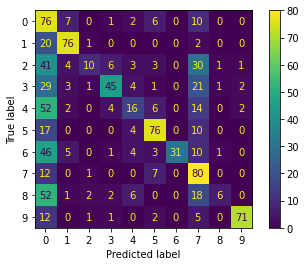

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [10]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/wordnet/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_huffpost/wordnet/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "a social unit living together",
    "a particular branch of scientific knowledge",
    "an activity that is diverting and that holds the attention",
    "a machine for performing calculations automatically",
    "knowledge acquired by learning and instruction",
    "an active diversion requiring physical exertion and competition",
    "an extended social group having a distinctive cultural and economic organization",
    "the commercial activity of providing funds and capital",
    "the study of government of states and other political units",
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 22:26:22,894 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_huffpost/wordnet/model/best-model.pt
init TARS
Sentence: "Do I have to pay taxes on my points ? ? I hope not . I just got to level 3 and if I do have to pay then I ' m going to be in trouble . 21-47 % depending on your other sources of points ."   [− Tokens: 48  − Sentence-Labels: {'label': [the study of government of states and other political units (0.6027)]}]
the study of government of states and other political units
Sentence: "does any body go to robert c. cooley middle school ? just wonderin NO NO NO CLUE EVEN WHERE DAT IS"   [− Tokens: 21  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.4607)]}]
knowledge acquired by learning and instruction
Sentence: "what is the best way to find people you have not heard from in a long time , lost friends or family free or not ? friends from high school ... go to classmates.com ."   [− Tokens: 35  − Sentence-Label

Sentence: "How do I get a real born again christain on the net ? It appears that the question period has expired . If you have received an answer that meets your needs , please choose one of those as a ' best answer . ' If you have n't received a good answer for your question , you may want to consider the following,1 ) Re-post your question . Newer questions get more activity on Yahoo ! Answers than old ones.2 ) If you do re-post your question , consider why it was n't answered the first time . Could it be more specific ? Could it be worded better ? Were there grammatical or spelling errors ? Was it in the best category ? If it does n't seem likely that re-posting your question will help you , then here ' s a listing of my favorite ' answer sites ' . Maybe one of them will help you.Answers.com http : // www.answers.com / Bartleby http : // www.bartleby.com / Yahoo Reference http : // education.yahoo.com / reference / HowStuffWorks http : // www.howstuffworks.com / Wikipedia http : // 

Sentence: "do u think i look good judging my avatar { LoLZ } ? email me your answer at ressesFolife @ yahoo.com No try again.No ... No ... NO ! I look better then that in real life ."   [− Tokens: 38  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.0798)]}]
the commercial activity of providing funds and capital
Sentence: "I ' m 15 and I need a job for the summer . Where should I work ? When I was 15 , I worked as a chambermaid at a motel near my house . You make an hourly rate plus tips , and you can control the length of your workday to some extent . For example , if it was a hot , sunny day and we wanted to go to the beach , we busted our azzes and cleaned really quickly to get out of there , and if it was rainy or something , we took our time and stretched out our hours , working longer and making another hour or two ' s wage ."   [− Tokens: 120  − Sentence-Labels: {'label': [a social unit living together (0.4811)]}]
a social unit living toget

Sentence: "how routers work ? a wireless router will allow you to connect to internet.it actually hides your physical IP address , so that it adds a layer of security . if anybody pings your machine they will get the router IP , which is very generic ."   [− Tokens: 47  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.1561)]}]
a machine for performing calculations automatically
Sentence: "Have been a victum of a false sexual harrassment charge ? Many person have had this happen and even if innocent it seems to cost them their jobs . Has this happened to you ? What did you ? First , any company would be obligated to conduct a thorough and fair investigation before terminating you for sexual harassment . Unfortunately , many of these cases end up being a `` she said '' versus `` he said '' situation . Since the damages from a female alleging harassment can be more than disciplining or terminating a male employee ( especially a white male under 40 ) com

Sentence: "need help in colorado ? Im a drug addict and I live with my boyfriend who hits me and i need to get out of this situation now ... .. Does anybody know of some places in Denver Colorado , that could help me ? Or any advice. . PLEASE help Denver Area Service Center , Inc.2701 Alcott St.Suite 369Denver , CO 80211-4210e-mail : denver-al-anon @ ecentral.comTo speak to a recovering addict call us at ( 303 ) 832-DRUG ( 303 ) 832-3784 ( 303 ) 321-8895Office Hours : 9 am-4:30 pm M-F 10 am-1 pm Sat . 24-Hour Number : ( 303 ) 321-8788 ( After office hours , an Al-Anon member will return your call . )"   [− Tokens: 119  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.8014)]}]
the commercial activity of providing funds and capital
Sentence: "I need to think of a 5 minute presentation for a promotion at work , on any topic ! Do you have any ideas ? Do something controversial-like the war-maybe that will get attention . One time , at my work , a lady

Sentence: "Is it necessary to register URLs with the Board of Equalization if a Fictitious Business name is being used ? A business is required by law to register with the Board of Equalization its DBA ( doing business as ) name . If a business merchant desires to make its presence in the world wide web , is it required to register URL addresses with the county assesor ' s office and Board of Equalization ? No , the URL is just an address , like your street address but then on the internet.If you use the URL as a name in your marketing to refer to your business ( not just to point to your website ) , then you need to register the URL.Why do n't you ask them , then you ' ll know for sure ."   [− Tokens: 140  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.7529)]}]
the commercial activity of providing funds and capital
Sentence: "How can I be better ? I am a secretary for a pretty small company . I have always thought that I was doing good at my jo

Sentence: "what is the difference between brand name and trade mark ? A Brand Name is simply the name of a company , product , service , or combination of these . ( e.g . Coke , Chevrolet , IBM , Jelly Belly , etc . ) If you want to get technical , you can also have `` Sub-brands '' like Cherry Coke , Diet Coke , etc.A TradeMark is something entirely different . It ' s simply a legally protected word or phrase , used to `` protect '' that word or phrase . Typically protection only applies within a specific business category ( e.g . beverages ) and within a specific country . The protection prevents others in the industry from using the same phrase . Examples of things that may bear a trademark are brand names , taglines ( `` The choice of a new generation '' ) , or the names of sub-brands or specific services : `` McGriddle '' . It ' s also possible to trademark sounds ( the ABC tones , the sound of a Harley Davidson engine ) and logos ( but sometimes with limited success - Harley Davi

Sentence: "I have a Sony _ VAIO FE11H laptop . i cant 't enter BIOS , because i do'nt know what is the pssword ? how i can find Or skip Bios password to enter the BIOS utility to chane `` First Boot Device '' & change my Windows.I forget my pass ... . That is very important ... Please Help ME . Please . Try admin . That is the default password for everything windows based . If you entered a Admin Password , remove the Password Clip on the MoBo boot up and passwords are cleared . Its not actually called the Password Clip , but it is a connector on the MoBo that when taken off will clear the passwords or set them to default wich is blank or admin . Dont feel comfy working inside the computer ? good , read up on that alot , one static discharge can nuke a BIOS / CMOS ."   [− Tokens: 159  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.7122)]}]
a machine for performing calculations automatically
Sentence: "does anyone know why my computer is failing to 

Sentence: "My computer power supply died - what do i need to do to swtich the hard drive to another computer - regarding ? in terms of SW and OS ? i have another computer that has a bad hard drive and would liek to put the hard drive from the power failed computer in it . what do i have to do regarding sw and os configuration ? thanks well in case u want to pull back the older hard drive from the other computer u ' ll have to put in the good drive into the same first ide slot and make sure that the jumper is set to make the good drive a master ( the jumper is a small plug situated at the back end besides the power supply socket of the hard drive -- hope u know what i ' m talking abt ) next u will have to boot the computer from the hard drive now here u might experience a problem if both the mother boards are not of the same model as the drivers on the new drive will be different from the ones required for the new mother board ... so press F8 ( or u may do without is altogether ) and tr

Sentence: "How do I animate using HTML ? you ca n't `` USE HTML '' ... you ' ll need some sort of dhtml or javascript , or even a little simpel asp.investigate about that.I suggest : http : // www.htmlgoodies.comvery good page about javascript and stuff.that Joe Burns guy , taught me a lot ."   [− Tokens: 55  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.4356)]}]
a machine for performing calculations automatically
Sentence: "When is McAfee protecting my computer ? When McAfee starts up on my PC I get a box saying `` McAffee ActiveShiels is running and protecting your computer '' with an OK botton to click . When I click on the OK McAfee seems to go away . What should I do to be sure it is protecting my PC ? McAfee like most virus scanners should have a small icon in the system tray that shows if it ' s active , usually it ' s red if everything is active and running fine and black if something ' s not active . If you do n't have this icon in the sy

Sentence: "My combobulater has foozled , what can i do ? : ( ? You need to install a discombobulator ."   [− Tokens: 20  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.2291)]}]
the commercial activity of providing funds and capital
Sentence: "How do I insert data in PHP script into a specific spot ? I currently can insert code into the end of a text file , but I need to be able to insert code after a specific spot : More info and Script here : http : // www.codingforums.com / showthread.php ? t = 77506Jameshttp : // www.thesmartass.info / index.php ? main = oaq Hi James , Sorry for not being abble to answer any of your questions : ( Do you remember when you answered me about favicon.ico ? You were right ! I just do n´t know how to do what you ´ve instructed , because I think your instructions were to web developers . I ´m saing this because I ´ve just found a site which teach exactly what you told me , but it ´s for programmers not for ordinary 

Sentence: "How to delete the blocked pop-ups from the computer ? depends on which one you are using , but most can be removed , by going to add & remove in control panel.if its the one that comes with xpservice pak2 just turn it off ."   [− Tokens: 46  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.8201)]}]
a machine for performing calculations automatically
Sentence: "Any Yahoo Expert Answer Please ! ! ! ? Today I Do n't Ask Any Questions ! ! ! Please Do n't Answer Me Except The Stupids ! ! ! So , you are back again . See I am here to welcome you ."   [− Tokens: 45  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.5338)]}]
knowledge acquired by learning and instruction
Sentence: "How to Make Your Friends Believe You ' re a Computer Geek ? Read up on the lingo , and shockingly ... learn something about computers ."   [− Tokens: 27  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.8357)]}

Sentence: "What is the easiest and most affordable way to back up my internal hard drive my cd drive does not work ? use a flash drive - you get them to 5 gb now"   [− Tokens: 34  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.0493)]}]
a machine for performing calculations automatically
Sentence: "how can i check my emails from another computer ? as long as you are using free public email systems like yahoo , you can check your email anywhere . if you are using a corporate email , ask the administrator if the system is web-enabled . if it is , ask for the web address of the email system . using a web browser , use the address given by the administrator to login to your account . you can now check your emails . one more thing , if your email system is set to downloading your email locally , you can not access the downloaded email from your other computer because it is already stored locally ."   [− Tokens: 120  − Sentence-Labels: {'label': [a machin

Sentence: "Why is it a penny for your thoughts , but as soon as you open your mouth it ' s called putting your two cents in ? Where did the other penny come from ? what an intriguing question ! so do i get two points and 3 pennies ?"   [− Tokens: 50  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.6274)]}]
the commercial activity of providing funds and capital
Sentence: "Whats that quote that goes something like `` its useless trying to convince a person who has already ... .. ? made up their mind about whatever they ' re discussing '' `` A man convinced against his will is of the same opinion still . ''"   [− Tokens: 47  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.4371)]}]
a particular branch of scientific knowledge
Sentence: "why so many college students dropout school during their first semester ? please give me good reasons . I think it is because they just were n't ready for college , especially if they go ri

Sentence: "I ' m curious ... how many men actually know how to tell when a woman has had an orgasm ? ( There is a way to tell . ) Yes , the tell tale physical signs - contraction of THOSE muscles , production of THAT fluid , increase in breathing and heart rate , change to pupil dillation , increased sensitivity all over , shaking leg , deeper moan than `` When Harry met Sally '' scream - all are good indicators - might not be all , but will be a few of these - the point when all women are their most attractive ... ..."   [− Tokens: 108  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.7541)]}]
a particular branch of scientific knowledge
Sentence: "im doing a paper on cocaine ! HELP ! ! ! ! ? ok im doing a paper on cocaine.i read somewhere that it is cheaper to produce one gram of crack than it is to produce one gram of sugar.can anyone confirm this ? if so do u have a source ( book , article , etc ) ? thanks so much for your help . so do a little research o

Sentence: "should i study in summer ? ? Please tell me i ' m going to 11th grade and i do n't know if i should study or just have fun in summer ... Have fun , enjoy your time being young , because in college you are not going to have a choice ."   [− Tokens: 54  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.7871)]}]
knowledge acquired by learning and instruction
Sentence: "I want to go into the Air Force when I get out of High School - see extension ? I want to go into the Air Force when i get out of high school , but i do n't know how to break it to my parents b / c my sister wants to write and she wants to go into some kind of english career . my uncle , my aunt , and both of my grandpas were in the armed forces , my uncle in the air force , maybe b / c my uncle told me stories . i have no idea , but i told my parents that i was thinking about the military , but they flipped out at me and were like , `` why ca n't u be more like your sister '' or `` 

Sentence: "Quick Question ? Do you think Majoring in Theatre Education and Musical Theatre with a minor in Communication Education is to much , how long do you think it will take me to graduate , Do you know of any schools that have all of these majors and minor besides SIUE and ISU , in IL . Which one is better . I really want to teach musical theatre and preform to ! Where do you plan on teaching ? Most school districts do n't even have the money for any kind of arts programs for kids . If you want to be a performer , you do n't need a degree in theater ... success in theater has absolutely nothing to do with what college degrees you have . Do a bit more planning and research about what you want to do . I have many , many friends who have undergraduate AND graduate degrees in theater ... they ' re still waiting tables ."   [− Tokens: 166  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.8808)]}]
knowledge acquired by learning and instruction
Sentence: "

Sentence: "why is the Arabian gulf is important ? oil"   [− Tokens: 9  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.0058)]}]
the commercial activity of providing funds and capital
Sentence: "where can i find critical articles on the short story a rose for emily ? You could try EBSCO host at the university library ... or you could even try your local library website . They usually have access to either ERIC or EBSCO . I get a lot of info from both of these . : ) That ' s a super story , by the way : )"   [− Tokens: 70  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.3499)]}]
knowledge acquired by learning and instruction
Sentence: "what is the origin of the english word lollygag ? As you have surmised to `` lollygag '' is to dawdle , fool around , and just generally do everything except what you should be doing . As a verb , `` lollygag '' ( or `` lallygag '' ) dates back to around 1869 , and a noun form , meanin

Sentence: "Help asap ! ! ! ! ? my friend needs some ideas for an extended metaphor poem help ! ! ! ! ! ! ! ! ! Metaphors are very effective ways of developing ideas in poems ; one special form , the `` extended metaphor , '' can be particularly effective in certain situations . An extended metaphor is a comparison that provides the basis for an entire poem or for a lengthy section of a poem ; its value lies in keeping the reader ' s attention focused on a single clear image while at the same time allowing the writer to develop a number of different aspects of an idea.For instance , look at `` The Hound '' by Robert Francis : Life the houndEquivocalComes at a boundEither to rend meOr to befriend me.I can not tellThe hound ' s intentTill he has sprungAt my bare handWith teeth or tongue.Meanwhile I standAnd wait the event.The poem begins by equating `` life '' and `` the hound '' and creating a clear image of the dog running towards the speaker ( thereby giving tangible substance to the o

Sentence: "i need inside information on the real life of J.D . Salinger ? particularly good info on the catcher in the rye . this is research for an english assignment . American novelist and short story writer . Salinger published one novel and several short story collections between 1948-59 . His best-known work is THE CATCHER IN THE RYE ( 1951 ) , a story about a rebellious teenage schoolboy and his quixotic experiences in New York . J.D . Salinger was born and grew up in the fashionable apartment district of Manhattan , New York . He was the son of a prosperous Jewish importer of Kosher cheese and his Scotch-Irish wife . In his childhood the young Jerome was called Sonny . The family had a beautiful apartment on Park Avenue . After restless studies in prep schools , he was sent to Valley Forge Military Academy ( 1934-36 ) , which he attended briefly . His friends from this period remember his sarcastic wit . In 1937 when he was eighteen and nineteen , Salinger spent five months in 

Sentence: "miley cyrus is my favorite actress ... .. your opinion ... ... ... .. ? She ' s definitely the best sitcom actress under 18 right now !"   [− Tokens: 28  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9639)]}]
an activity that is diverting and that holds the attention
Sentence: "Now : Why the black box of a plane is not black ? Usually they ' re painted orange , to make them easier to find after a crash ."   [− Tokens: 30  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9065)]}]
a particular branch of scientific knowledge
Sentence: "mariah ? or Jessica ? women singers . Which one do you like best ? Mariah , she can sing her a.s.s off ! !"   [− Tokens: 25  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9439)]}]
an activity that is diverting and that holds the attention
Sentence: "Whats the best Rock Concert you saw in the past 12 months ? Do n't answer if you

Sentence: "What are the exact lyrics to `` my Boo '' ? USHER & ALICIA KEYS LYRICS My Boo [ Usher intro : ] There ' s always that one personThat will always have your heartYou ' ll never see it comingCause you ' re blinded from the startKnow that you ' re that one for meIt ' s clear for everyone to seeOoh baby ooh you ' ll always be my boo [ Alicia intro : ] I do n't know bout cha'llBut I know about us and uhThis is the only wayWe know how to rockI do n't know bout cha'llBut I know about us and uhThis is the only wayWe know how to rock [ Usher verse : ] Do you remember girlI was the one who gave you your first kissCause I remember girlI was the one who said put your lips like thisEven before all the fame and People screaming your nameGirl I was there when you were my baby [ Chorus : ] [ Usher : ] It started when we were youngerYou were mine my booNow another brother ' s taking overBut its still in your eyes my booEven though we used to argue it ' s alrightI know we have n't seen each ot

Sentence: "So what do you think of the whole Luke and Lorelai thing ? ( Gilmore Girls ) ? Do you think they ' re going to get back together ? Or just write Luke out of the show ? Do you think Lorelai was wrong ? Luke definately wo n't be written out of the show , but I do n't think they ' re going to get back together , which makes me mad . I think that he might start dating Anna Nardini . I think Lorelai was worng for sleeping with Christopher and telling Luke about it , but I do n't hink she was wrong in saying `` it ' s now or never ''"   [− Tokens: 119  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9768)]}]
an activity that is diverting and that holds the attention
Sentence: "Joke Joke Joke hahaha ? I have nothing against blondes ! Blonde paint job A blonde , wanting to earn some money , decided to go out as a handyman-type and started canvassing a wealthy neighborhood . She went to the front door of the first house and asked the owner 

Sentence: "What state do the Simpsons live in and how do you know ? no one knows ... it ' s a running gag on the show as there are so many cities named Springfield.That is unless you can find a Springfield located on the ocean , near mountains , in the middle of the country , both east and west of the Mississippi River and possessing a major airport and a nuclear power plant ."   [− Tokens: 75  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8256)]}]
an activity that is diverting and that holds the attention
Sentence: "How can I find values for old 78 rpm records . Some are REALLY old . ? I have an Excel spreadsheet made up if anyone would like to look at it . hi im not too sure about on the internet . have you tried the magazine record collector its an english mag"   [− Tokens: 54  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8149)]}]
an activity that is diverting and that holds the attention
Se

Sentence: "All emo / scenes ... Please read for I have an Important message ? Why do you label yourself ! Have you ever heard the expression `` Never Follow '' ? Do you realize this is just a Fad created by some producers in MTV ? Do you realize you are making yourself stupid silly with these accesories GIVING away all your hard earned money to those companies marketing this useless trend ? Why do you do this . Is it for attention , have you had enough recogition , your freinds , what . I know the qualites of Freedom of speach , but when it comes to obsurd things like these , I just want to know . Be yourself and be the same ! Mayby you will not get persecuted as much if you woke up and realize it ' s just a FAD or something that will eventualy ware out . i know . i hate labels and people who label and people who label them . i like punk and hardcore rock , but i ' m not either of them . punk is a description of SOUND not people anymore . i only listen to bands that do n't label ."   [

Sentence: "where can I get truly free mp3 downloads ? The P2P programs such as LimeWire , BearShare , Kazaa , etc . can be used to download music for free . However , i warn you that downloading music / movies using them , is illegal.Download at personal risk ."   [− Tokens: 50  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.2079)]}]
an activity that is diverting and that holds the attention
Sentence: "Can you be nice for one day or even just one minute ? This is for the trolls under the bridge can you mostly for today instead of going to questions and just giving thumbs down on decent questions and the answers for GP how about giving a thumbs up or even better if you do n't like everyones answer abstain soem of us actually research answers to serious questions and it is annoying to get thumbs down from an idiot who does n't even answer the question . Just go back under the bridge someone is waiting for you Gruff Gruff Thumbs up for you from

Sentence: "Might anyone know where I can access a French translation of the poem `` Eternity '' , written by William Blake ? `` Eternity '' comes from Ralph Vaughan Williams ' song cycle Ten Blake Songs , written for voice and oboe . I found the following translation on the Website of the Encyclopédie de l'Agora . The translator ' s name is not given , but perhaps if you contact the editors , they can tell you more . ( I also want to point out that there should be a circumflex accent on the interjection ' ô ' in `` ô vie ailée . `` ) JoieJoie , o vie ailée , Brisée d ’ être captive ; Éternité promiseAu baiser qui s ’ accorde à ton vol ."   [− Tokens: 131  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.7853)]}]
an activity that is diverting and that holds the attention
Sentence: "wot animal is pluto ? ? ? ? ? ? ? ? ? dog"   [− Tokens: 14  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9994)]}]
a particular branch

Sentence: "single ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? call me go to a dating site , you will have more luck"   [− Tokens: 30  − Sentence-Labels: {'label': [a social unit living together (0.6181)]}]
a social unit living together
Sentence: "my husband buys sexy magazines and videos but does not make love with me , is he having an affair ? Yes . With himself ."   [− Tokens: 26  − Sentence-Labels: {'label': [a social unit living together (0.1285)]}]
a social unit living together
Sentence: "How do i re-teach my self to trust ? I grew up being sexual abused , Raped and cheated on by men. . Learning not to trust ANYONE . I have now found my soul mate and i cant trust him although i know i should / can , is there some way to re-teach myself to trust again ? sometimes we do n't trust because others have abused that gift we have given them ... and the very saddest part is once that innocence of trust has been taken it is n't so easy to get back . But I will tell you this ... the only way to move for

Sentence: "How do I approach my wife about either adding another woman or going to see another woman by myself ? I just need some helpful suggestions here , please no moralistic preaching . Oh yes my friend you are so lucky I have bumped into your question . I have dedicated countless scientific hours to the study of this and I am happy to inform you that I have succeeded.THere are several aproaches you can take but first you need to find out why you want to do this ? a ) is it just a sexual thing ? b ) is it that you want to incorporate a second wife into the family dinamycs ? What exactly are you feeling ? Know that this is not a quick process , it will take you months if not years to work on her in order to agree to this and even then it may not happen ever.With that said lets get to it.If its the sexual thing then it will be a lot easier than you think , its not that hard to get a woman to agree to it , now the realtionship part that one will be a tought one but let me assure you t

Sentence: "what is it about nice girls / boys why do we ALWAYS finish last ? i was raised that you treat others the way that you want to be treated . so now i am in the dating scene and i always end up the little sister of the group . mean while i watch as my friends and the guys that i like end up with just horrible people . enough so that i decided to take a break . i am just so frustred with this that i dont know what to do . Hi , Finish last ? Relationships are built on trust , compromise , love , caring , and wanting to make another happy ; doing everything you can to make it so.I ' ve been married now for 29 yrs to a wonderful woman . First marriage ended in Divorce after 7 yrs.I am one of the `` good guys '' ; respecting others.Do n't change yourself ; be honest and open.Ending with horrible people is their choice ! ! ! If you are selective , dating can be fun . Chose someone to date who has similar likes as you ... . who seems to be trusting and honest.You ca n't lose ! Do n't 

Sentence: "What do you think about this ? Me and my husband has an arguments last night because my baby is crying so much and we dont know why. . My nanny came to me to get the baby , I gave it to her because maybe to her she will not cry . My husband told me like `` What you / we gon na do if the nanny is not with us ? He said it was just a joke , but to me , I feel I am insulted because it seems to me that I am incompetent mother and wife to my son . Am I really too sensitive ? What do you think about it ? We came from a different nationalities. . he is american I am asian. . But eventhough , we are happy together , just the language barriers sometimes causes problem . He thinks this I think that way ... You seem to have a handle on the language , so I hardly think that ' s the problem . I ' ve seen Americans on here who did n't write as understandably as you have . I ' m pretty sure he did n't mean to hurt your feelings , but he DOES have a valid point , hun ! It is nice having a na

Sentence: "i am not a girl but had sex with a 16 year old , i am 16 , its not wrong is it ? You did n't give enough information.Did you have sex with a 16 year old boy ? Girl ? what country ? what state ? Different states have different laws on age of consent . In some places , it ' s as young as 14 . In some , it ' s as high as 18 . Here in Texas , it ' s 17 , but two people within three years apart can have sex ( meaning 16 and 16 is ok legally ) . You did n't say if your question was a legal one or a moral one . I ' m inclined to believe it ' s OK morally , and likely to be OK legally , but again , depends on where you live ."   [− Tokens: 154  − Sentence-Labels: {'label': [a social unit living together (0.7143)]}]
a social unit living together
Sentence: "how do I not make every women I meet a best friend ? I ' m a very nice guy and consider myself a gentleman , which does n't help me much . I end up having alot of girl-friends instead of a girlfriend . You are so sweet . Being a ge

Sentence: "what is a family ? group of people"   [− Tokens: 8  − Sentence-Labels: {'label': [a social unit living together (0.5853)]}]
a social unit living together
Sentence: "i dunno how to court a girl ? im a teenager boy who dont know how to court a girlpeople say that im a gay because of my voicebut do u think that im gay because only of my voice ? i ' m telling them that im a guy not a gayi hve see a girl hu i think is for mecan u pls advice me on how to court a girland advice me how to make my voice lke a teenager boy ? Do n't worry about your voice it will get deeper later on . I think the best thing you can do to court a girl is to give her flowers . A single red ( or if you know her favorite color then use that ) rose makes quite a statement . Have you told her you like her ? Do n't stress about it just be yourself and take it slow . Ask her out and when you pick her up have some flowers ready . If she likes stuffed animals you can give her little stuffed animals after you ' v

Sentence: "hi , has any of you gone trekking in scotland ? I ' m planning a trip there , do you know any nice trekking group there THERE ARE LOTS OF ADVENTURE CENTRES IN SCOTLAND ... JUST WRITE TO THE SCOTTISH TOURIST BOARD ... .. THERE IS A SITE ON LINE"   [− Tokens: 51  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.0029)]}]
an activity that is diverting and that holds the attention
Sentence: "How do u tell a guy that u dont like him ? but without hurting his feelings Begin with praise and honest appreciation . THen be frank and tell him the truth . Then let him save his face . Give him a fine reputation to live up to ."   [− Tokens: 50  − Sentence-Labels: {'label': [a social unit living together (0.4064)]}]
a social unit living together
Sentence: "when will my lil bro in laws tooth come out ? date and time sounds like any minute now"   [− Tokens: 19  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention 

Sentence: "Women , help me please ! ? This might be the toughest decision i have to make . I was date raped 12 weeks ago , and got pregnant by the mother ****** . He left the country right after , so i decided to have an abortion . I live in a very conservative area , and decided to go for the Cytotec abortion . Took 12 pills and inserted 6 , bleeded 15 days , and come to find out today that the fetus is still alive . It already has a heartbeat , and i do n't want to abort it now because of that , but i live in fear that it will have birth defects related to the pills i took . Please help me clear my mind , i wo n't read any idiotic insults , as i realize what i did , nor will i pay attention to condemnig me , but what can i do now ? I was raped by my x . He got 8 months in jail while i recieved the rest of my life with the most beautiful girl . I tried abortion and was unable to finish it . Take this as a sign from God that there is a reason for this child . If you are unable to keep 

Sentence: "wart problem ? ok , i have tried everything : getting them frozen off , wart remover , everything , and the warts keep coming back , and multiplying ... . very upset over this ... and becoming insecure ... . please help ! ! ! ! what should i do ? ? ? ? ? ? ? Hi Red RockHere are some ideas on how to heal the issue.CausesWarts are caused by any of 35 viruses and are often a consequence of poor diet and nutrition , poor hygiene , and , in the cases of genital warts , unprotected sex . Warts also become more common as a consequence of aging with corresponding diminished immune function.Caution : Some warts can turn into cancerous tumors . If they do not seem benign , consult with a physician immediately . -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- ... Natural CuresNote : Natural healing of warts may require one to two months of care , with the wart disappearing suddenly in one to three days.Aromatherapy : Lemon essential oil applied topically can speed healing . Thuja oil is a

Sentence: "Do I get rid of aphasia after I had a stroke un ' 97 ? Aphasia , a total or partial loss of the ability to use words , sometimes is quickly and completely cured after a stroke . Since your case has been for a number of years , it is likely that aggressive therapy is necessary . To date , treatment is mostly confined to speech therapy which helps to improve reading , writing , and comprehension skills . Speech pathologists and neurologists would be best trained to help you recover . You should certainly contact a neurologist for more treatment information . According to the National Institute of Neurological Disorders and Stroke , patients tend to recover skills in language comprehension more completely than those skills involving expression.On a more global level , there are a number of people who believe neural connections can be re-forged through increased usage . A number of studies have shown that those who think more or are involved in more intelletually challenging tas

Sentence: "My girl and I are planning to get tattoos ? Were spose to get the our first tattoos , the same one together but she got scared and I was more relieved then upset , I got a custom one that I designed but now she is not afraid. . she ' s hypoglycemic ... I ' m not sure if its a good idea that she gets one . I do n't have all the details of hypo and tattoos but I hear its similar too Diabetes which I think disables the body ' s ability to heal correctly or efficiently enough for tattoos . I love her and I know she wants to do this but I need some more knowledge and assurance before she goes and does this tomorrow . Give me some answers please . I would check with a doctor first , you do n't want to go taking advice on things that could harm someone from this site trust me half of us on here are smart asses who think they know it all and the rest are pervs.I ' m not sayin ' which one I am : )"   [− Tokens: 196  − Sentence-Labels: {'label': [a particular branch of scientific know

Sentence: "Peeing CANT STOP CANT GO ! ! ! ! HELP ! ! ! ! ! PLEASE ! ! ! ! ! ? I m a teenager and have a peeing promblem . The thing is , around 3 times per month i constantly get urges that I have to pee immediatly . So i go to the bathroom and nothing comes out . So , constantly im in and out of the bathroom . This can continue a couple hours or most of the day . Does anyone know why or how i can stop this ? Or what should I do ? ? ? Please make a doctor ' s appointment . This is not normal so you have an issue that only he / she can diagnose ."   [− Tokens: 130  − Sentence-Labels: {'label': [a social unit living together (0.2018)]}]
a social unit living together
Sentence: "I woke up this morning and my stuffed monkey was standing over me , wearing a mask . What do I do ? 1 . Spank ur monkey2 . Get urself a furry pu $ $ y3 . Lather , Rinse , Repeat < -- - this appears to work for any question4 . Stuff the pu $ $ y5 . Go back to sleep , it was just a dream"   [− Tokens: 71  − Sentence-

Sentence: "Reason for high ammonia levels in humans ? I have a friend who was treated in a hospital because of High ammonia blood and ? urine ammonia levels . In humans and most other mammals , ammonia is produced in the bloodstream when mitochondria ( the power plants of cells ) break down amino acids for energy . The left over chemicals combine to form ammonia . Ammonia is normally converted to a chemical compound called urea by the liver . If the liver is not functioning in this regard , or if liver failure occurs , a high ammonia level can result . Other symptoms of liver failure include jaundice ( a yellowing of the skin and the whites of the eyes ) ."   [− Tokens: 125  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9619)]}]
a particular branch of scientific knowledge
Sentence: "How do i get rid of a soar muscle ? If its from working out take some vitamin E and rest it for a day or two . Eat a few high protein meals to help it recover . Try the supple

Sentence: "what is the best diet pill ? Diet pills do work , although not forever . You see , diet pills are like any other drug your body builds resistance to them and their effectiveness wears off when you take them for a while . They do work short term but there are better ways to boost your metabolism and lose the weight.There are several ways to boost your metabolism but lets look at the factors that drive your metabolism first . 1 . Genetics - you have very little control , but you are not a prisoner of your genes . 2 . Lean Muscle Mass - this one throws most people off because women think , oh no I dont want muscles and men think I guess I have to look like a body builder . Lean muscle mass is simply your weight minus the weight of your organs , bones , fluids and fat . You increase lean muscle mass primarily through eating properly , resistance exercise , and a lifestyle that doesnt promote catabolizing activites ( smoking , heavy drinking and drug use ) 3 . Frequency of meals 

Sentence: "Does anyone else think that Bi-Polar disorder can be cured thru faith ? Also , any suggestions of other ways You ' ve learned to handle this problem w / o drugs whould be of tremendious help . I go to Yoga and meditate , but need more understanding on how to help myself . no , it is a chemical imbalance ."   [− Tokens: 63  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.6646)]}]
a particular branch of scientific knowledge
Sentence: "What are the best jobs for people with bipolar disorder ? Working with the Public . I would n't expect anything less"   [− Tokens: 22  − Sentence-Labels: {'label': [the study of government of states and other political units (0.1963)]}]
the study of government of states and other political units
Sentence: "Why are there inny belly buttons and outy belly buttons ? It ' s time to start worrying when you find someone without one big time"   [− Tokens: 26  − Sentence-Labels: {'label': [a social unit living together (0.075

Sentence: "My lower back really hurts . What can I do to make it stop ? I was lifting heavy boxes and now it hurts . I pulled my back years ago and have recurrent back aches , so I empathize with you . Its hard to stand when you ' re sitting , hard to sit when you ' re standing , hard to walk , hard to turn to look back , etc . etc . First of all , you should see a doctor to rule out a slipped disk , ligament tear , etc. . Second , and until you can get attention , the best help for back pain is to stay off the back , and that means lying down flat on your back on a firm mat / mattress ( not hard floor or soft couch or mattress ) . Do n't put a pillow under your head . Tent your legs at the knee and stay that way , for as long as you can . That is the best . You may want to take an analagesic or something , and if you have a heating pad , heat helps reduce the muscle spasm . I use a muscle relaxant tablets and an anti-inflamatory cream , heat and stay off my back at every opportunity t

Sentence: "I am a 160 pound 5'4 ninth grader that NEEDS to loose weight ! ? If i do not loose weight soon , i will loose my whole freshman year to mean bullies who make fun of me ! Please help me ! ! ! if you really WANT THIS BAD then your gon na have to WORK HARD FOR IT . not just think `` oh if i skip this meal then i can have a chocolate cake for dessert '' . or if your gon na end up giving up why even try to lose weight ? first of all you need to watch what ur eating . no more snacking on all that unhealthy stuff . eat an apple if your hungry . next you need to start excercising . taking a jog every day will help . enrolling in a hot yoga class could help too . hot yoga is when you do yoga in a very hot room and you lose weight much faster ."   [− Tokens: 170  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.8823)]}]
knowledge acquired by learning and instruction
Sentence: "why when people have sex they move it back and forth instead of just leave it 

Sentence: "If there is no court order or written agreement who has custody of the child ? The mother of my boyfriends child agreed to let him pick the child up from her state and bring him to Texas for good . There is no court order or written agreement and now she claims she wants the child back . He went and filed for a child support on her a few weeks ago because she was saying he ' d never see the child again once he came back . My question is I ' ve heard that if there is no court order that whoever has possession of the child has custody at that time . Will the courts recognize this notion . Any legal aids advice please help . She has threatned to file but we believe we filed first . She had custody of the child initially because he did n't ask for it . If he had , then there would have been a custody agreement . It sounds like one is needed now . Probably she will have permanent custody & he will have visitation rights.I sure hope that they can come together & provide the child 

Sentence: "Hello.I ' m from Iran . I have a question , How i can immigrate to U.S.A ? I ' m female ? i want to married whit a man in california he was iranian.i want to know it is possible for me to immigrate thaer and how ? Is he now a citizen ? If so , it should not be to hard . You will have to pass some basic test to make sure you know enough of the basics about our culture ( our language which sounds like you have down , some basic laws , ect dont worry , you will not be expected to know anything right off the bat , they will give you time to learn and its really not much to learn ) I think you will also hve to do some other test to make sure you are healthy and do not have any diseases.Make sure you apply for a visa and then citizen ship as soon as possible , you do not want to be tagged as an illegal immigrant !"   [− Tokens: 181  − Sentence-Labels: {'label': [the study of government of states and other political units (0.6311)]}]
the study of government of states and other poli

Sentence: "What is the best way to bring down a dictator ? There are many dictators still power , in this civilised era . These rulers are repressive , autocratic or backed by the military . Please share how to bring down a dictator peacefully . http : // en.wikipedia.org / wiki / List _ of _ dictators Trying to bring down a dictator who is backed by a military peacefully ? ? ? Now I ' ve heard everything ."   [− Tokens: 80  − Sentence-Labels: {'label': [the study of government of states and other political units (0.9827)]}]
the study of government of states and other political units
Sentence: "State Medical Board question - can someone help ? I am a licensed esthetician ( skin care ) and cosmetologist who wants to purchase a laser for aesthetic treatments . These lasers have no worse complications for the patient than waxing or electrolosis , but my state medical board just announced 3 months ago that this laser light technology could only be used by licensed physicians , PAs and CRNs

Sentence: "Where are ALL the US territories and commonwealths ? How far reaching is the US ? I know of Guam , PR and the US Virgin Islands . But there must be more . There are a few islands in the Pacific , but otherwise it ' s just those three , the 50 states , and the District of Columbia ."   [− Tokens: 62  − Sentence-Labels: {'label': [the study of government of states and other political units (0.4146)]}]
the study of government of states and other political units
Sentence: "What has George Bush got to loose ? He already owns the oil fields so he can charge us what he wants ! He will be paid 200k per year every year he lives out of office . He has the cash to live and the oil to meiser . He ca n't go wrong can he ? the only thing he has to loose is his head ... this whole country hates him ... ... we are stuck ... . hopefully that indian spell will not fail us this time"   [− Tokens: 91  − Sentence-Labels: {'label': [the study of government of states and other political units (0.8

Sentence: "What do you really think of George W. Bush , the president of the United States of America ? A fool , a hero ? Let me know your thoughts about him ! George W. Bush is a multifaceted man . He is definitely a social conservative -- and in that , he and I have absolutely nothing in common -- , but he is also not a raging nationalist ( and I celebrate the latter , especially with regards to immigration ) . He is pro big business , but he is not an economic conservative ( his administration ' s spending is extraordinarily high ) . It also is the case that there have been spectacular changes between the two administrations he ' s lead . The first four years were dominated by dismal decision-making , war-mongering , deception , terrible self-inflicted damage to the image of the US internationally , foolish foreign policy , etc . The second Bush administration has been orders of magnitude better on the foreign policy front , with Condoleeza Rice at the helm ( now the US is finally l

Sentence: "Is there a site that I can obtain free legal advice ? I have googled it but it seems there are a lot with hidden costs . Websites are NOT good places for `` free legal advice . '' The rules of ethics that govern attorneys in the U.S. severely restrict the types of `` advice '' that may be posted on a website . Attorneys can not offer `` advice '' without accepting someone as their client , running a conflict of interest check , and establishing a relationship that allows the attorney to fully understand the issues and facts underlying a person ' s problem.If you just need general information , oftentimes , there will be articles or resources posted by particular institutions or non-profits based on topic area . Need to know about whether a student can sue a teacher for yelling at him in a classroom ? Try firstamendmentcenter.org . You get the point . In addition , you can always call your local bar association . They will provide you with a reference for attorneys with areas

Sentence: "Looking for info on the Sullivan rule as per `` only child '' , in combat . ? Contrary to popular belief , `` only sons , '' `` the last son to carry the family name , '' and `` sole surviving sons '' must register for the draft , they can be drafted , and they can serve in combat . However , they may be entitled to a peacetime deferment if there is a military death in the immediate family . Provisions regarding the survivors of veterans were written into Selective Service law after World War II . Details have varied over the years , but the basic premise remains the same ; where a family member has been lost as a result of military service , the remaining family members should be protected insofar as possible.It is important to keep in mind that the provisions are directly related to service-connected deaths . The mere fact that a man is the only child or only son does not qualify him for consideration - he must be the survivor of one who died as a result of military servic

Sentence: "what if the absence isnt all the time ? I am talking about missing once every blue moon , not all the time . They are not going to accept a doctors note if you have the flu for 3 days and not enough sick time to cover the absence . If i am throwing up how does that constitute a safe work environment for my co-workers . If one person comes to work with the flu because of fear of getting fired the in return gets 10 more people sick how are the helping the productivity of the company . I have a child at home with severe asthma and i know i dont want to get the flu and give it to my son because someone didnt want o get fired . ( just an example ) There is FMLA , Family Medical Leave Act that protects you . Not sure where you live but there is usually a state act also . Here in Oregon we are allowed to leave work and say it is a family leave and no questions are asked and no penalties involved . If your employer is being unfair you should go to this link and read up . You have ri

Sentence: "If a small nuclear bomb were to detonate in NYC how many people would die in a 25 miles radius ? I ' m a hs teacher and I ' m trying to develop a lesson plan on the cold war / nuclear proliferation era , and now possible terrorism plot to use a nuke . Too many variables to consider , it ' s impossible to answer in this forum . First of all , what do you mean by `` nuclear bomb . '' There are crude nuclear devices , which is called `` dirty bomb . '' A dirty bomb is basically a normal bomb with whole bunch of radioactive waste . The explosion will send the particles into the air , making SOME people die and thousands sick . Also , decontainmenation would be a nightmare and public panic . A small bomb could also be a tactical nuclear device . Those are the so called `` suitcase '' bombs developed during the cold war . They are , for the most part , not very effective . Consider that it ' s very heavy and easy to detect by our current sensors in major cities . If your definitio

Sentence: "when we see one yarning. . we also will yarn. . why is that happeneing ... ? The reasons for this are unclear ; however , recent research suggests that yawning might be a herd instinct . Other theories suggest that the yawn serves to synchronize mood behavior among gregarious animals , similar to the howling of the wolf pack during a full moon . It signals tiredness to other members of the group in order to synchronize sleeping patterns and periods of activity . With humans the infectiousness of yawning might suggest that this is a behavioral pattern not deleted through evolution ."   [− Tokens: 104  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9973)]}]
a particular branch of scientific knowledge
Sentence: "when the oil splits in the floor suddenly the the fire starts why : ? if the water is pored can the fire be stopped ORthe fire will not be disappear ? The flash point of the oil has been reached . Any fire can be stopped if the fuel is remo

Sentence: "who is invented temperature of degree ? There are 3 main temperature scales.The earliest , Fahrenheit , was invented in 1724 by Daniel Gabriel Fahrenheit , a German Physicist . This scale is still used widely in America.The next and most `` metric '' of the scales , Celsius , was invented in 1742 by Sweedish astronomer Anders Celsius . This scale is the standard in Europe.The last scale , Kelvin , is the SI standard measurement for temperature . It was invented in 1848 by Lord William Thomas Kelvin . The kelvin scale starts at absolute zero , therefore 0 C / 32 F is equivalent to 273.15K"   [− Tokens: 109  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9984)]}]
a particular branch of scientific knowledge
Sentence: "Star Trek : is scotty ' s theory ( Movie # 4 ) on `` Transparent Aluminum '' actually viable ? has such really been made ? Perhaps some molecular form involving aluminum could be transparent , but it has n't been made yet . That is on

Sentence: "How much is 10 oz in grams ? What is the formula for conversion ? There are 28.35 grams per Ounce . 10 ounces x 28.35 g / 1 ounce = 283.5 grams ."   [− Tokens: 34  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.4154)]}]
a particular branch of scientific knowledge
Sentence: "what is the formula to calculate flow of liquid ? Flow rate q is given byq = AVwhere A is the cross sectional area of the pipe through which the fluid is flowing , and V is the velocity of the fluid in the pipe.If you have a flow where the pipe diameter changes , conservation of flow states thatA1V1 = A2V2so if the pipe diameter decreases ( and this the CSA gets smaller ) the velocity of the fluid increases , and vice versa ."   [− Tokens: 86  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.8054)]}]
a particular branch of scientific knowledge
Sentence: "what the different between hot dip galv steel and mild steel ? Galvinized steel is steel ( usua

Sentence: "What is the meaning of chemistry ? Definitions of chemistry on the Web : * the science of matter ; the branch of the natural sciences dealing with the composition of substances and their properties and reactions * the way two individuals relate to each other ; `` their chemistry was wrong from the beginning -- they hated each other '' ; `` a mysterious alchemy brought them together '' wordnet.princeton.edu / perl / webwn * Chemistry ( in Greek : χημεία ) is the science of matter and its interactions with energy and itself ( see physics , biology ) . Because of the diversity of matter , which is mostly in the form of atoms , chemists often study how atoms interact to form molecules and how molecules interact with each other . en.wikipedia.org / wiki / Chemistry * Chemistry is a Japanese popular music R & B duo . They are Dochin Yoshikuni ( 堂珍嘉邦 , born Nov 17 1978 ) and Kawabata Kaname ( 川畑要 , born Feb 28 1979 ) . They were the winners of the ASAYAN auction in 2000 ( by Sony M

Sentence: "Descartes ' Rule of Signs ? I do not understand Descartes ' Rule of Signs , so please help . I am not necessarily looking for the specific answer , but some direction on how to do these types of problems.Use Descartes ' Rule of Signs to determine how many positive and how many negative real zeros the polynomial can have . Then determine the possible total number of real zeros : P ( x ) = 2x ^ 3 - x ^ 2 + 4x - 7andP ( x ) = x ^ 8 - x ^ 5 + x ^ 4 - x ^ 3 + x ^ 2 - x + 1 Dascartes rule of signs says that the number of positive roots of a polynomial ( with real coefficients and ordered in descending powers ) is equal to the number of sign changes between consecutive coefficients or is less than that by an exact multiple of 2 ( since double roots are counted twice ) Negative roots are counted by changingthe signs of the coefficients of all odd powers of the variable and counting the sign changes the same as for positive roots.In your first problem there are 3 sign changes so ther

Sentence: "what is a mud puppy ? mud puppy , common name for North American salamanders of the genus Necturus , found in rivers and streams throughout the E United States and SE Canada . The name derives from an erroneous belief that mud puppies bark . Like its relative , the European olm , the mud puppy exhibits neoteny , i.e. , it reaches sexual maturity without losing its larval characteristics . Adults have lungs , characteristic of most adult salamanders , as well as gills , characteristic of larvae . Their short , sturdy limbs develop at an early stage . The mud puppy may reach a length of 12 in . ( 30 cm ) ; it is reddish brown and black-spotted above and grayish below , with conspicuous bushy red gills at the sides of its head . It walks on river bottoms and feeds primarily on crayfish and aquatic plants . Mud puppies are classified in the phylum Chordata , subphylum Vertebrata , class Amphibia , order Urodela , family Proteidae ."   [− Tokens: 176  − Sentence-Labels: {'label':

Sentence: "When you think about it , do you feel , God is closer to you than you think ? The Lord is close to the brokenhearted and saves those who are crushed in spirit . Psalm 34:18God ' s love is there daily to comfort and encourage us.Love and ~ Peace ~ yeah I most def . think He is closer than we think . He is omniscent . Just look at creation , you can see Him in pretty much everything ... even when we do n't realize it : )"   [− Tokens: 92  − Sentence-Labels: {'label': [a social unit living together (0.4726)]}]
a social unit living together
Sentence: "Question about the Christian faith ... ? Not to sound anti-Christian or anything like that , but it is my belief , through reading about and listening to Christians and their Bible ( s ) , that in reality , you are still Jewish . The only reason you left the term `` Jewish-Christian '' was because the deciples got angry when the leaders of the regular Jewish sects denounced the Jewish-Christian followers for believing that Christ w

Sentence: "if religous statues are allowed in city parks ? If religious statues are allowed in city parks , angels , madonas , etc . is it ok to put up a pentagram ? NO ! ! Religious icons don ’ t belong anywhere near PUBLIC PROPERTY ! Not everyone `` believes '' those who don ’ t shouldn ’ t have to be subjected to the iconology of those who do . That ’ s what churches , shrines , mosques , etc . are for !"   [− Tokens: 87  − Sentence-Labels: {'label': [an extended social group having a distinctive cultural and economic organization (0.029)]}]
an extended social group having a distinctive cultural and economic organization
Sentence: "How come homeless people just do n't get jobs ? ok , big dog , how are they reasonably going to do that ? They have no address , no reliable transportation , no real way to groom themselves or their clothing for interviews . How many people would hire such a person ? Even if you were willing to do so , how would you contact them for an interview ? Think t

Sentence: "what is the difference between Jesus and Allah ? The big difference we should take note of is this : ALLAH has no CHILDREN ! So ... . Allah is not the God of Abraham and so , since there is only one God , Allah is a false god of a false religion.Johnny"   [− Tokens: 54  − Sentence-Labels: {'label': [a social unit living together (0.2048)]}]
a social unit living together
Sentence: "What is your most embarrassing spelling mistake ? I did a paper once in which I referred to the public library for some reason or another . Only when I got the paper back , my instructor personally pointed out to me that I had spelled `` public '' without the `` L '' ... . making it a pubic library instead , lol . That was a little embarrassing ."   [− Tokens: 71  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.958)]}]
knowledge acquired by learning and instruction
Sentence: "When does the `` new '' year start for you ? Today is my birthday and I realized that my per

Sentence: "are ghosts real ? have u ever seen one ? are they scary ? Hi - I believe in ghosts , I have one or two in my house , laugh if you like I do n't care ! I live in a little cottage in County Antrim , and strange things are always happening , in my hall I have a lamp that switches itself off only when my husband passes by it , we have had friends and family walk past it to test it but it only happens to him - in that hallway a saw a little boy with dark hair and wearing a striped t-shirt and shorts skipping past our living room door , we do not have children there is only the 2 of us . Also my husband was working in the garage and he dropped his hammer but continued working on , when he bent down to pick it up about 10 mins later it was sitting on the stepladders beside him - it totally freaked him out . We hear voices and once even singing . My house does'nt feel evil or creepy , but a happy place . My father-in-law was mucking out our stables and heard some-one speaking - he a

Sentence: "in revelation who do you think John speaks of as the false prophet ? Grace unto you , and peace , from God our Father and the Lord Jesus Christ.First of all John did not write book of Revelation , rather Paul did , signed it , and sent it `` unto John '' ; as is noted for us in both the first and last verses.Revelation ends with the `` salutation '' ( token ) of Paul , which is thrice noted it ' s written by his `` own hand '' . http : // www.godshew.org / Revelation.htm # Authorhttp : // www.godshew.org / Revelations3.htmMany would think John would be referring to Paul , for John spent much of his life discrediting Paul , to point Paul refers to him as a thorn in the flesh.But only `` false prophet '' named in Bible is `` Barjesus '' . Acts 13:6 `` And when they had gone through the isle unto Paphos , they found a certain sorcerer , a FALSE PROPHET , a Jew , whose name [ was ] Barjesus '' Strong ' s Concordance : Barjesus = son of Jesus ( or Joshua ) Upon give more earnest 

Sentence: "Will having one black family in my neighborhood bring down the whole neighborhood ' s value ? Well , I ' m only 17 , I ' m not selling a house or anything ( Duh . ) But there is this family that moved in my neighborhood and they ' re black . The houses are really expensive and I was just wondering will that one family bring down the whole neighborhood value ? Because I ' ve seen this happen before. . Green Island Hills. . yeah no one wants to move over there anymore. . Why do they have to ruin such good , influential and well mannered neighborhoods ? Edit : I did ask this in the Business section , but I think only black people were answering the question , since the answers were a little race-biased . Having a black family in your neighborhood will not bring anyone ' s neighborhood value down . Sadly enough , usually when a black family moves in , you will find out who the biggest bigot is first . Because they will be the first to leave . By you being 17 years old , you have

Sentence: "How awesome was the game between Rutgers and Louisville tonight ? I ' m a huge college football fan but now a huge fan of Rutgers or Louisville . However . . . this is why college football rules ! ! ! What an awesome game ! ! ! Great game . . great setting , great crowd . . . TOTALLY AWESOME ! ! ! ! You can keep the watered down pool of mediaocrity that is the NFL ! ALL the REAL football is played on saturdays and thursday nights ! ! ! WHOO HOOOO ! RU , Rah Rah ; RU , Rah Rah ; Whoo-Rah , Whoo-Rah ; Rutgers RahUp Stream Red TeamRed Team Up StreamRah , Rah , Rutgers Rah ! ! Go RU : )"   [− Tokens: 131  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9974)]}]
an active diversion requiring physical exertion and competition
Sentence: "I know five of the original six hockey teams , Detriot , Toronto , Montreal , Boston , New York , is the 6th Chicag ? Yes , it ' s Chicago . But before the original 6 , there as been many other teams

Sentence: "Who should I start : Marc Bulger or Eli Manning ? About 4 weeks ago , I had trouble making this decision because they were both playing great . Now , it ' s the opposite.Should I start Bulger on the road against Arizona or Manning at home against the Cowboys ? I know it ' s obvious that I should go with Bulger because Arizona is awful , and Manning will only get worse against the Cowboys . But I ' m interested in other opinions . You got it right . Bulger without question . Arizona ' s defense is not that good and this should be a shoot-out . Do n't forget that Arizona ca n't run the ball so they are going to pass and pass often.As far as Eli goes , the G-men are in dissaray right now and Eli looks horrible . Good luck this week ."   [− Tokens: 153  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9979)]}]
an active diversion requiring physical exertion and competition
Sentence: "i need to know what strecthes to do , when you r

Sentence: "hey who knowz why you cant play streetball can be in the nba ? Pro players do n't play streetball because of the risk of injury . A minor injury could cost them tens of thousands of dollars ."   [− Tokens: 39  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9975)]}]
an active diversion requiring physical exertion and competition
Sentence: "Are there any players in the NBA who are Italian or speak Italian ? Andrea Bargnani , from Italy , could be the top pick in the NBA Draft this year.Kobe Bryant used to live in Italy because his dad played in their pro league . Yes ... Kobe speaks Italian ."   [− Tokens: 52  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9964)]}]
an active diversion requiring physical exertion and competition
Sentence: "how can i hit my tennis forehand with top spin ? please tell in simple words . Starting with the grip : You probably want to use a ' Semi-West

Sentence: "who should hold the womens title after lita retires ? and i told everyone that lita was retireing and i rule edge and orton are going to own team dx this unday Definitely Mickie James ! But if the WWE decide they want somebody new to be Women ' s Champion they should go with Melina because she is the most capable of holding that Title besides Mickie James . I also heard that Nattie Neidhart , Jim `` The Anvil '' Neidhart ' s daughter , will soon be joining the Women ' s Division and she is more than capable than holding that Title . Plus , the WWE might try to give the Title to Torrie or Maria , who have been improving in wrestling , to hold the Title so there will be more competition in the division . I hope that answers your question ."   [− Tokens: 150  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9768)]}]
an active diversion requiring physical exertion and competition
Sentence: "snow accumulations for woodbridge , new j

Sentence: "Who will win the World Cup and why ? would love to say England but it ai n't gon na happen all the time Brazil are in it ! they just have takes to be world champions : ( i should have more faith in my country !"   [− Tokens: 48  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9926)]}]
an active diversion requiring physical exertion and competition
Sentence: "who is Ira Murchinson . The guy that ran track ? He ran the 100m at the olympics bac in 1940 ' s or 1950 ' s Ira James Murchison ( February 6 , 1933 - March 28 , 1994 ) was an American athlete , winner of the gold medal in 4x100 m relay at the 1956 Summer Olympics.Born in Chicago , Illinois , Ira Murchison was noted for his exceptional speed from the starting block , which earned him a nickname Human Sputnik.Before the Melbourne Olympics , Murchison equalled twice the 100 m world record of 10.2 and ran in Berlin a new world record of 10.1 , thus becoming one of the favouri

Sentence: "are nets better playing run & gun ? YES ! With Jason kidd running the break Vince Carter on one side and Richard Jefferson on the other what can go wrong !"   [− Tokens: 32  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9906)]}]
an active diversion requiring physical exertion and competition
Sentence: "Can a women ever coach in the NFL ? I want to become a assitant coach when i grow up and most people are telling me to just forget it but i believe in my heart I can make it.What do you think ? I dont think theres a rule against it , but in order to become a coach in the NFL , you have to have a tremendous knowledge of the game . This usually steams from playing experience . I dont know if you have playing experience , but unless you do or will , getting a coaching job is extremely unlikely . But , hey , if you really think you can do it , go for it . Theres always a chance . You better be prepared , because a woman coach wont

Sentence: "wat is da best football team ? Brazil ."   [− Tokens: 9  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9947)]}]
an active diversion requiring physical exertion and competition
Sentence: "What is an NFL Tender Contract Offer ? It means that its the first offer that the original team gives and then later another team can beat that offer and the player will then belong to the new team ."   [− Tokens: 40  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9957)]}]
an active diversion requiring physical exertion and competition
Sentence: "How does Luongo ' s salary affect the Canuck ' s salary cap ? Luongo signed a 4-year contract worth $ 27 million . The first year he will be paid $ 6 million , the second year $ 6.5 million , the third $ 7 million and the fourth $ 7.5 million . The average salary for each year is $ 6.75 million . Will his contract count on the Canuck ' s payroll as $

/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [11]:
print(report)

                                                                                  precision    recall  f1-score   support

                                                                          Health       0.00      0.00      0.00       107
                             a machine for performing calculations automatically       0.75      0.66      0.70        99
                                     a particular branch of scientific knowledge       0.38      0.88      0.53       100
                                                   a social unit living together       0.34      0.78      0.47        96
                 an active diversion requiring physical exertion and competition       0.87      0.84      0.85        92
                      an activity that is diverting and that holds the attention       0.67      0.61      0.64       107
an extended social group having a distinctive cultural and economic organization       0.50      0.11      0.19        87
                       

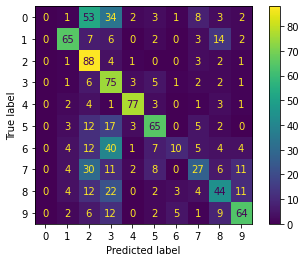

In [12]:
cm_display = ConfusionMatrixDisplay(cm).plot()